Chargez le jeu de données Reuters à l’aide de tf.keras.datasets.reuters.
Prétraitez les données en veillant à convertir les textes en séquences de tokens numériques compatibles avec le modèle. Utilisez des techniques comme la tokenisation et le padding pour obtenir des séquences de longueur uniforme.
Conseils : Utilisez Tokenizer de tf.keras.preprocessing.text pour transformer les textes en séquences numériques et pad_sequences pour uniformiser la longueur des séquences.

In [3]:
from tensorflow.keras.datasets import reuters

# to tokens
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenized = Tokenizer(num_words=10000)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# same length
train_data = pad_sequences(train_data, maxlen=256)
test_data = pad_sequences(test_data, maxlen=256)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. **Construction d’un modèle de réseau de neurones** : 
   - Créez un modèle de réseau de neurones profond pour la classification des textes. Expérimentez avec différents types de couches pour trouver une architecture adaptée (par exemple, couches d'embedding pour les mots, couches denses, ou couches LSTM ou GRU pour capturer la structure des séquences).
   - **Conseils** : Essayez d’abord une architecture simple (comme une combinaison d’Embedding et Dense), puis explorez l’ajout de couches récurrentes pour une meilleure compréhension du contexte des mots.

In [1]:
# creation model avec erchitecture simple Embedding + Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=256))
model.add(Flatten())
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()


c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3786 - loss: 2.4668 - val_acc: 0.5075 - val_loss: 1.9115
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5179 - loss: 1.8018 - val_acc: 0.5799 - val_loss: 1.6639
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6201 - loss: 1.5043 - val_acc: 0.6283 - val_loss: 1.5446
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6991 - loss: 1.2406 - val_acc: 0.6555 - val_loss: 1.4196
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7618 - loss: 1.0035 - val_acc: 0.6700 - val_loss: 1.3872
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8220 - loss: 0.7858 - val_acc: 0.6745 - val_loss: 1.3557
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8639 - loss: 0.6104 - val_acc: 0.6761 - val_loss: 1.3709
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8952 - loss: 0.4862 - val_acc: 0.6756 - val_loss: 1.4146
Epoch 9/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

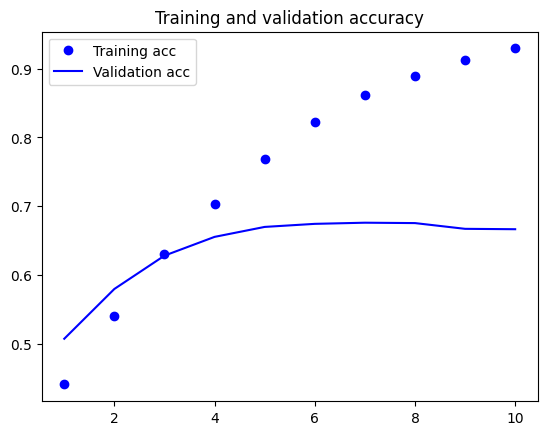

In [4]:
trained_model = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt

history = trained_model.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()



3. **Optimisation des hyperparamètres** : 
   - Modifiez les hyperparamètres du modèle (par exemple, nombre de neurones, nombre de couches, taux d’apprentissage, nombre d’époques) et observez leur impact sur les performances du modèle.
   - **Conseils** : Commencez avec un taux d'apprentissage de base (par exemple, 0.001) et ajustez-le en fonction de la rapidité de convergence. Expérimentez également avec des tailles de batch différentes et observez leur effet.

Training model with embeddings=8, optimizer=rmsprop, epochs=5, batch_size=32
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.3745 - loss: 2.4791 - val_acc: 0.5014 - val_loss: 1.9065
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5334 - loss: 1.7843 - val_acc: 0.5982 - val_loss: 1.6719
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6352 - loss: 1.4846 - val_acc: 0.6344 - val_loss: 1.5020
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7049 - loss: 1.1934 - val_acc: 0.6672 - val_loss: 1.4127
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7677 - loss: 0.9901 - val_acc: 0.6750 - val_loss: 1.3592


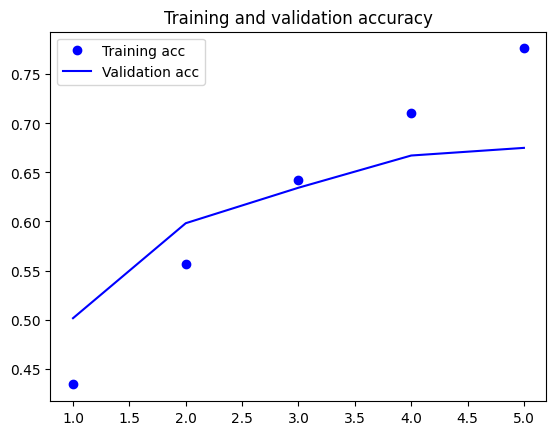

---
Training model with embeddings=8, optimizer=rmsprop, epochs=5, batch_size=64
Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.3507 - loss: 2.5846 - val_acc: 0.4819 - val_loss: 1.9980
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4985 - loss: 1.9368 - val_acc: 0.5081 - val_loss: 1.8276
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5313 - loss: 1.7139 - val_acc: 0.5849 - val_loss: 1.6739
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6140 - loss: 1.5306 - val_acc: 0.6132 - val_loss: 1.5722
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6811 - loss: 1.2842 - val_acc: 0.6272 - val_loss: 1.5014


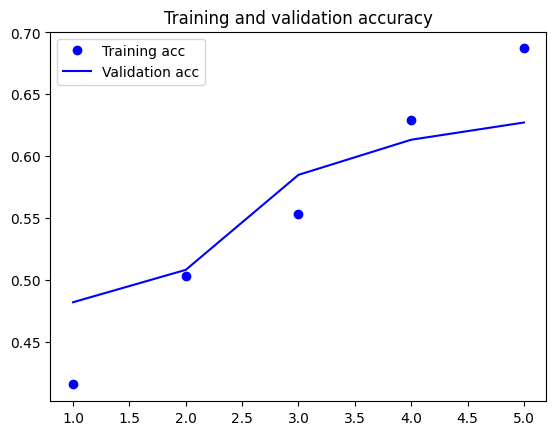

---
Training model with embeddings=8, optimizer=rmsprop, epochs=5, batch_size=128
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.3341 - loss: 2.7206 - val_acc: 0.4519 - val_loss: 2.1886
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4544 - loss: 2.1119 - val_acc: 0.4752 - val_loss: 2.0017
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4919 - loss: 1.9500 - val_acc: 0.4969 - val_loss: 1.8807
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5189 - loss: 1.7842 - val_acc: 0.5192 - val_loss: 1.7840
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5803 - loss: 1.6387 - val_acc: 0.5832 - val_loss: 1.6859


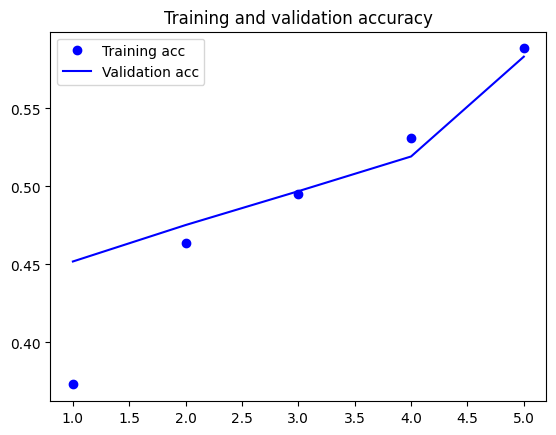

---
Training model with embeddings=8, optimizer=rmsprop, epochs=10, batch_size=32
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.3860 - loss: 2.4556 - val_acc: 0.4947 - val_loss: 1.9498
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5222 - loss: 1.8310 - val_acc: 0.5654 - val_loss: 1.6995
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6073 - loss: 1.5300 - val_acc: 0.6205 - val_loss: 1.5675
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6787 - loss: 1.2714 - val_acc: 0.6311 - val_loss: 1.4923
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7620 - loss: 1.0192 - val_acc: 0.6472 - val_loss: 1.4500
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8130 - loss: 0.8559 - val_acc: 0.6583 - val_loss: 1.4349
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8607 - loss: 0.6487 - val_acc: 0.6561 - val_loss: 1.4384
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8875 - loss: 0.5350 - val_acc: 

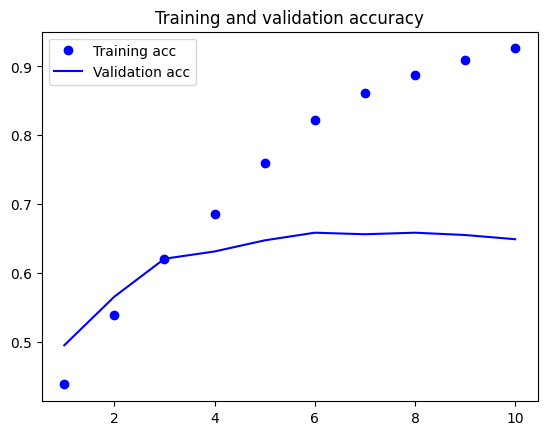

---
Training model with embeddings=8, optimizer=rmsprop, epochs=10, batch_size=64
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.3665 - loss: 2.5956 - val_acc: 0.4836 - val_loss: 2.0167
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5071 - loss: 1.9177 - val_acc: 0.5331 - val_loss: 1.8027
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5464 - loss: 1.7266 - val_acc: 0.5893 - val_loss: 1.6647
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6297 - loss: 1.4859 - val_acc: 0.6110 - val_loss: 1.5667
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6782 - loss: 1.2899 - val_acc: 0.6266 - val_loss: 1.5030
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7303 - loss: 1.0912 - val_acc: 0.6333 - val_loss: 1.4686
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7883 - loss: 0.9116 - val_acc: 0.6544 - val_loss: 1.4382
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8259 - loss: 0.7819 - val_acc: 

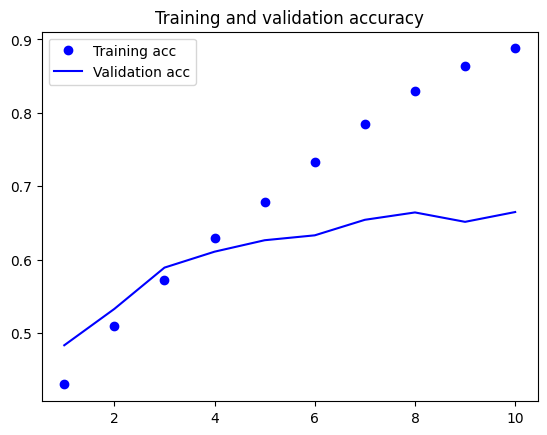

---
Training model with embeddings=8, optimizer=rmsprop, epochs=10, batch_size=128
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3347 - loss: 2.7122 - val_acc: 0.4791 - val_loss: 2.1156
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4962 - loss: 2.0345 - val_acc: 0.5097 - val_loss: 1.9663
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5048 - loss: 1.8901 - val_acc: 0.5281 - val_loss: 1.8223
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5449 - loss: 1.6959 - val_acc: 0.5782 - val_loss: 1.7149
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6029 - loss: 1.5765 - val_acc: 0.5943 - val_loss: 1.6515
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6384 - loss: 1.3904 - val_acc: 0.6004 - val_loss: 1.6015
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6876 - loss: 1.2365 - val_acc: 0.6283 - val_loss: 1.5294
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7270 - loss: 1.1227 - val_acc: 0.6372 - val_lo

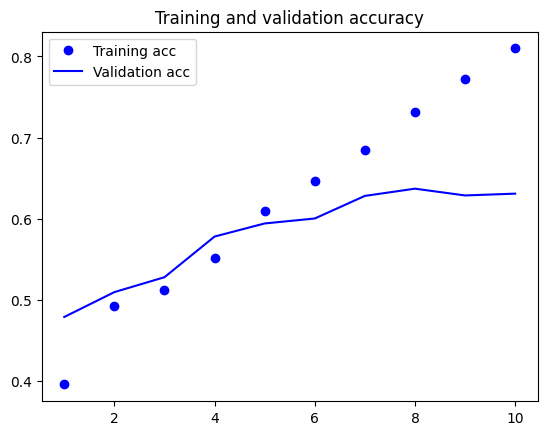

---
Training model with embeddings=8, optimizer=rmsprop, epochs=15, batch_size=32
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3883 - loss: 2.4636 - val_acc: 0.5075 - val_loss: 1.9346
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5258 - loss: 1.7857 - val_acc: 0.5676 - val_loss: 1.6711
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6248 - loss: 1.4958 - val_acc: 0.6260 - val_loss: 1.5294
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6779 - loss: 1.3069 - val_acc: 0.6361 - val_loss: 1.4435
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7560 - loss: 1.0386 - val_acc: 0.6583 - val_loss: 1.3940
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8176 - loss: 0.8385 - val_acc: 0.6689 - val_loss: 1.3758
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8582 - loss: 0.6616 - val_acc: 0.6717 - val_loss: 1.3860
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8839 - loss: 0.5278 - val_acc: 

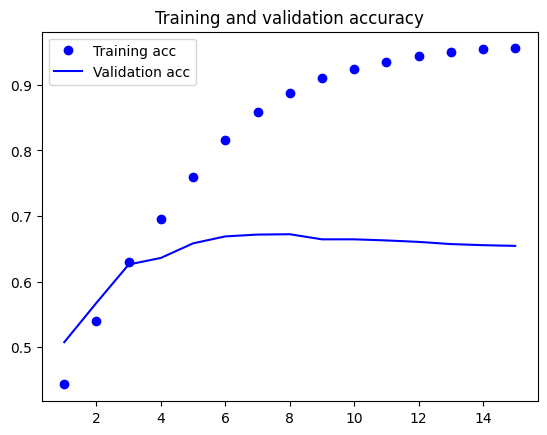

---
Training model with embeddings=8, optimizer=rmsprop, epochs=15, batch_size=64
Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.3721 - loss: 2.5283 - val_acc: 0.4875 - val_loss: 1.9878
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4906 - loss: 1.9447 - val_acc: 0.5275 - val_loss: 1.8119
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5486 - loss: 1.6946 - val_acc: 0.5893 - val_loss: 1.6855
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6180 - loss: 1.4803 - val_acc: 0.6077 - val_loss: 1.5837
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.6688 - loss: 1.2987 - val_acc: 0.6327 - val_loss: 1.5084
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7295 - loss: 1.1166 - val_acc: 0.6338 - val_loss: 1.4865
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7832 - loss: 0.9313 - val_acc: 0.6477 - val_loss: 1.4369
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8181 - loss: 0.7942 - val_acc: 

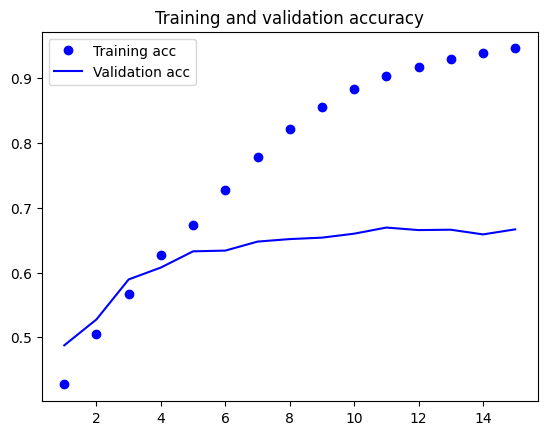

---
Training model with embeddings=8, optimizer=rmsprop, epochs=15, batch_size=128
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3423 - loss: 2.7245 - val_acc: 0.4780 - val_loss: 2.1595
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4721 - loss: 2.0925 - val_acc: 0.4964 - val_loss: 1.9488
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5116 - loss: 1.8359 - val_acc: 0.5454 - val_loss: 1.8047
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5542 - loss: 1.6967 - val_acc: 0.5526 - val_loss: 1.6996
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6099 - loss: 1.5357 - val_acc: 0.5899 - val_loss: 1.6117
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6497 - loss: 1.3648 - val_acc: 0.6144 - val_loss: 1.5617
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6874 - loss: 1.2339 - val_acc: 0.6361 - val_loss: 1.5081
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7365 - loss: 1.0952 - val_acc: 0.6405 - val_lo

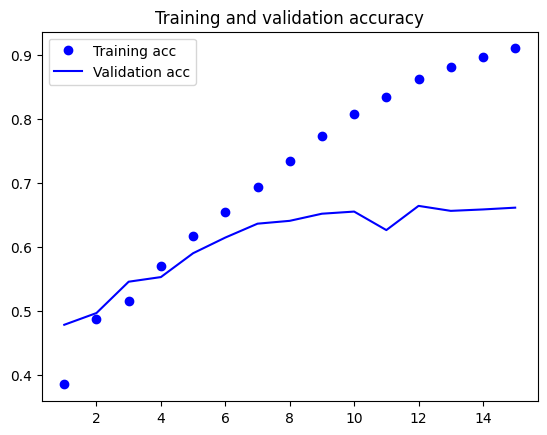

---
Training model with embeddings=8, optimizer=rmsprop, epochs=20, batch_size=32
Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.3886 - loss: 2.4474 - val_acc: 0.5008 - val_loss: 1.9320
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5115 - loss: 1.8472 - val_acc: 0.5509 - val_loss: 1.6966
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6301 - loss: 1.5010 - val_acc: 0.6216 - val_loss: 1.5203
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6982 - loss: 1.2459 - val_acc: 0.6433 - val_loss: 1.4233
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7718 - loss: 0.9714 - val_acc: 0.6722 - val_loss: 1.3610
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8374 - loss: 0.7422 - val_acc: 0.6694 - val_loss: 1.3449
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8677 - loss: 0.6116 - val_acc: 0.6678 - val_loss: 1.3650
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9041 - loss: 0.4624 - val_acc: 

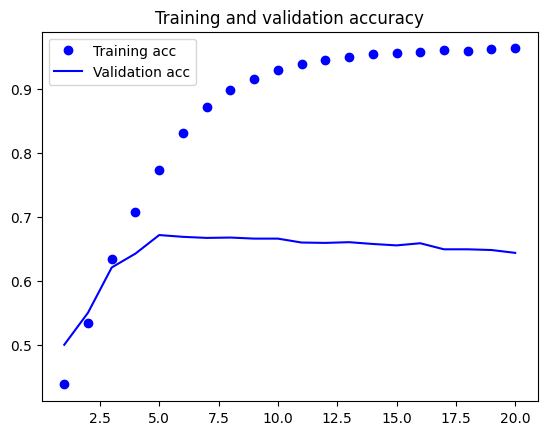

---
Training model with embeddings=8, optimizer=rmsprop, epochs=20, batch_size=64
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.3690 - loss: 2.5759 - val_acc: 0.4908 - val_loss: 1.9923
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4971 - loss: 1.9348 - val_acc: 0.5353 - val_loss: 1.7862
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5623 - loss: 1.6625 - val_acc: 0.5860 - val_loss: 1.6576
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6298 - loss: 1.4613 - val_acc: 0.6260 - val_loss: 1.5467
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6814 - loss: 1.2805 - val_acc: 0.6333 - val_loss: 1.4674
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7489 - loss: 1.0450 - val_acc: 0.6516 - val_loss: 1.4044
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7950 - loss: 0.8926 - val_acc: 0.6772 - val_loss: 1.3696
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8402 - loss: 0.7411 - val_acc: 

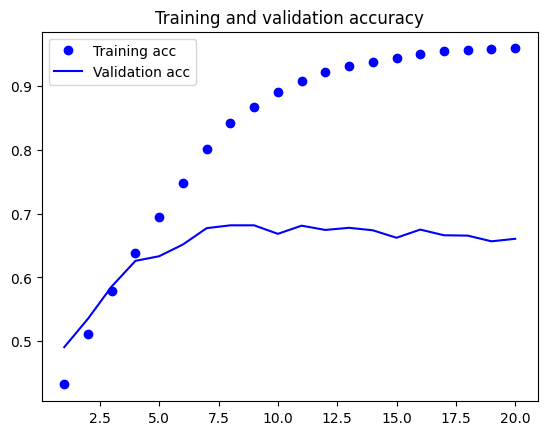

---
Training model with embeddings=8, optimizer=rmsprop, epochs=20, batch_size=128
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.3291 - loss: 2.7587 - val_acc: 0.4402 - val_loss: 2.1810
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4794 - loss: 2.0626 - val_acc: 0.4830 - val_loss: 1.9805
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5055 - loss: 1.8853 - val_acc: 0.5253 - val_loss: 1.8517
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5310 - loss: 1.7699 - val_acc: 0.5270 - val_loss: 1.7869
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5935 - loss: 1.5708 - val_acc: 0.6071 - val_loss: 1.6717
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6397 - loss: 1.4326 - val_acc: 0.6166 - val_loss: 1.5771
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6745 - loss: 1.2861 - val_acc: 0.6316 - val_loss: 1.5339
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7204 - loss: 1.1245 - val_acc: 0.6194 - val_l

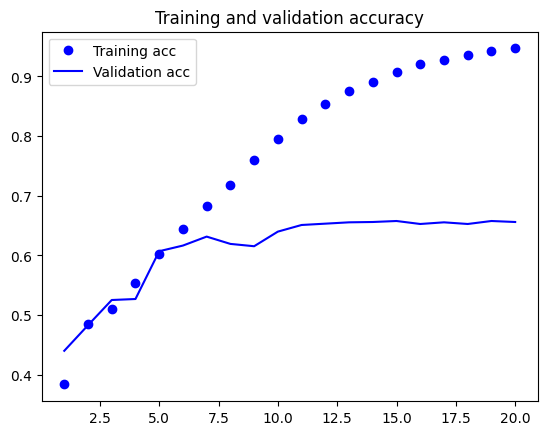

---
Training model with embeddings=8, optimizer=adam, epochs=5, batch_size=32
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.3444 - loss: 2.6004 - val_acc: 0.5092 - val_loss: 1.8937
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5268 - loss: 1.7818 - val_acc: 0.5793 - val_loss: 1.6439
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6388 - loss: 1.3901 - val_acc: 0.6394 - val_loss: 1.4775
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7500 - loss: 1.0064 - val_acc: 0.6811 - val_loss: 1.3708
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8583 - loss: 0.6665 - val_acc: 0.6811 - val_loss: 1.3434


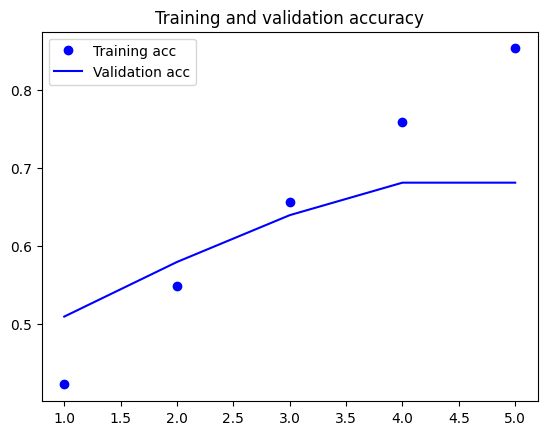

---
Training model with embeddings=8, optimizer=adam, epochs=5, batch_size=64
Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.3218 - loss: 2.7618 - val_acc: 0.4897 - val_loss: 2.0292
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4943 - loss: 1.9383 - val_acc: 0.5237 - val_loss: 1.7990
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5680 - loss: 1.6126 - val_acc: 0.5971 - val_loss: 1.6193
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6492 - loss: 1.3306 - val_acc: 0.6277 - val_loss: 1.4889
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7424 - loss: 1.0430 - val_acc: 0.6489 - val_loss: 1.4058


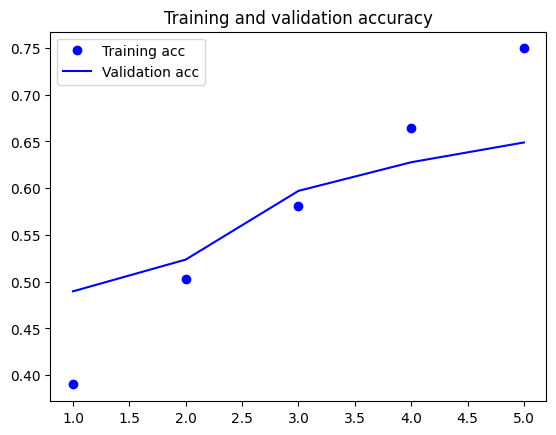

---
Training model with embeddings=8, optimizer=adam, epochs=5, batch_size=128
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.2616 - loss: 2.9877 - val_acc: 0.4652 - val_loss: 2.1701
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4755 - loss: 2.0828 - val_acc: 0.4997 - val_loss: 1.9350
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5054 - loss: 1.8367 - val_acc: 0.5181 - val_loss: 1.8060
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5418 - loss: 1.6380 - val_acc: 0.5710 - val_loss: 1.6858
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6245 - loss: 1.4271 - val_acc: 0.6021 - val_loss: 1.5865


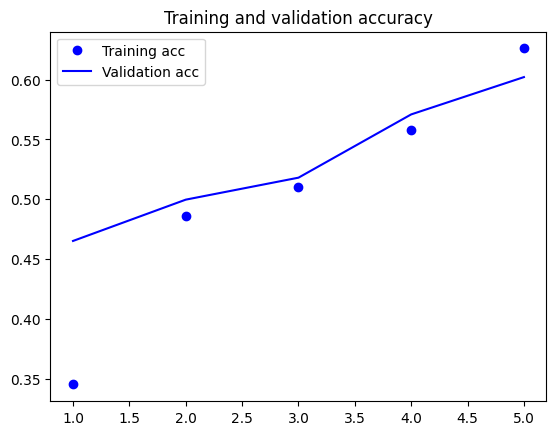

---
Training model with embeddings=8, optimizer=adam, epochs=10, batch_size=32
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3753 - loss: 2.5227 - val_acc: 0.5019 - val_loss: 1.8855
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5216 - loss: 1.7527 - val_acc: 0.5888 - val_loss: 1.6412
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6473 - loss: 1.3298 - val_acc: 0.6361 - val_loss: 1.4774
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7655 - loss: 0.9886 - val_acc: 0.6605 - val_loss: 1.3907
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8560 - loss: 0.6581 - val_acc: 0.6622 - val_loss: 1.3834
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8965 - loss: 0.4782 - val_acc: 0.6661 - val_loss: 1.4035
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9308 - loss: 0.3462 - val_acc: 0.6745 - val_loss: 1.4644
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9463 - loss: 0.2648 - val_acc: 0.6

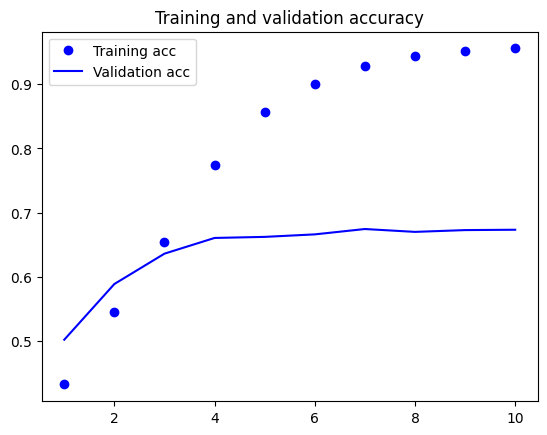

---
Training model with embeddings=8, optimizer=adam, epochs=10, batch_size=64
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.3437 - loss: 2.7794 - val_acc: 0.4864 - val_loss: 1.9948
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5047 - loss: 1.8946 - val_acc: 0.5337 - val_loss: 1.7701
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5794 - loss: 1.6245 - val_acc: 0.5949 - val_loss: 1.6065
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6541 - loss: 1.3306 - val_acc: 0.6349 - val_loss: 1.5056
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7479 - loss: 1.0299 - val_acc: 0.6489 - val_loss: 1.4526
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8236 - loss: 0.7798 - val_acc: 0.6483 - val_loss: 1.4234
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8791 - loss: 0.5911 - val_acc: 0.6539 - val_loss: 1.4371
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9136 - loss: 0.4518 - val_acc: 0.6

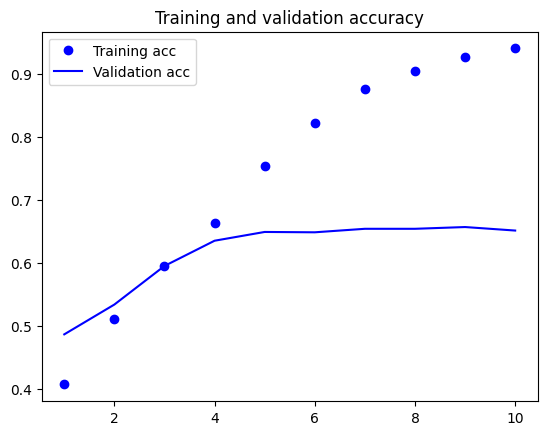

---
Training model with embeddings=8, optimizer=adam, epochs=10, batch_size=128
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.2809 - loss: 2.9376 - val_acc: 0.4307 - val_loss: 2.2103
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4489 - loss: 2.1123 - val_acc: 0.4891 - val_loss: 1.9609
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5052 - loss: 1.8424 - val_acc: 0.5103 - val_loss: 1.8292
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5416 - loss: 1.6633 - val_acc: 0.5598 - val_loss: 1.7028
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6159 - loss: 1.4478 - val_acc: 0.5871 - val_loss: 1.6054
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6604 - loss: 1.2760 - val_acc: 0.6166 - val_loss: 1.5355
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7297 - loss: 1.0696 - val_acc: 0.6210 - val_loss: 1.4854
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7822 - loss: 0.9083 - val_acc: 0.6416 - val_loss:

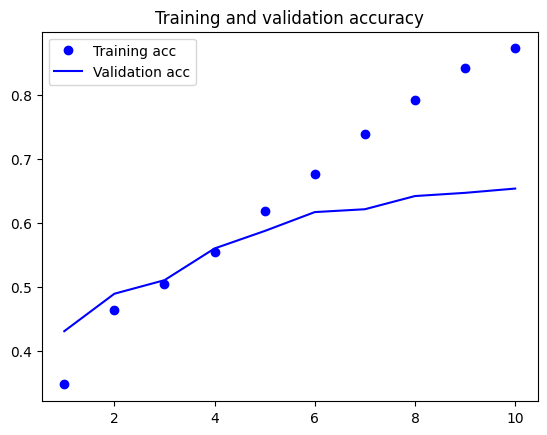

---
Training model with embeddings=8, optimizer=adam, epochs=15, batch_size=32
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3694 - loss: 2.5810 - val_acc: 0.4969 - val_loss: 1.8795
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5331 - loss: 1.7204 - val_acc: 0.5865 - val_loss: 1.6185
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6405 - loss: 1.3583 - val_acc: 0.6366 - val_loss: 1.4752
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7667 - loss: 0.9750 - val_acc: 0.6733 - val_loss: 1.3842
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8604 - loss: 0.6538 - val_acc: 0.6778 - val_loss: 1.3651
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9035 - loss: 0.4603 - val_acc: 0.6795 - val_loss: 1.4052
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9341 - loss: 0.3284 - val_acc: 0.6795 - val_loss: 1.4388
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9517 - loss: 0.2546 - val_acc: 0.6

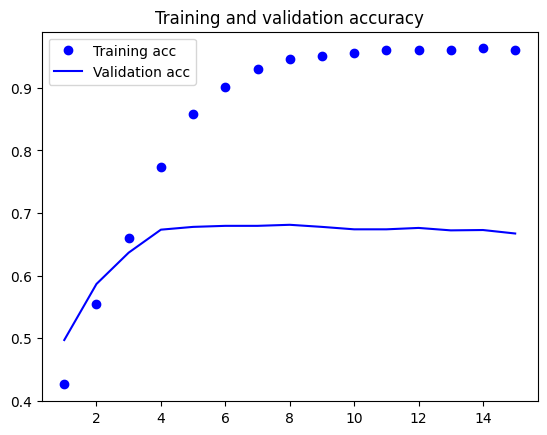

---
Training model with embeddings=8, optimizer=adam, epochs=15, batch_size=64
Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.3302 - loss: 2.7872 - val_acc: 0.4836 - val_loss: 2.0307
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4895 - loss: 1.9593 - val_acc: 0.5231 - val_loss: 1.7987
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5690 - loss: 1.6285 - val_acc: 0.5821 - val_loss: 1.6183
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6404 - loss: 1.3653 - val_acc: 0.6238 - val_loss: 1.4980
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7332 - loss: 1.0635 - val_acc: 0.6450 - val_loss: 1.4271
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8198 - loss: 0.8083 - val_acc: 0.6583 - val_loss: 1.3961
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8768 - loss: 0.5986 - val_acc: 0.6644 - val_loss: 1.3967
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9050 - loss: 0.4717 - val_acc: 0.6

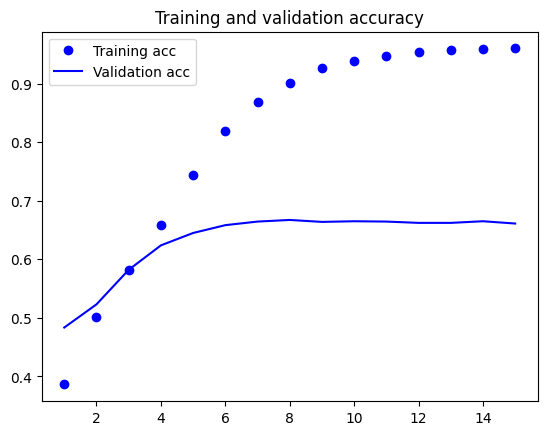

---
Training model with embeddings=8, optimizer=adam, epochs=15, batch_size=128
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.3501 - loss: 2.9287 - val_acc: 0.4591 - val_loss: 2.2046
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4692 - loss: 2.0892 - val_acc: 0.4930 - val_loss: 1.9388
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5154 - loss: 1.8349 - val_acc: 0.5281 - val_loss: 1.7990
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5607 - loss: 1.6392 - val_acc: 0.5676 - val_loss: 1.6708
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6114 - loss: 1.4492 - val_acc: 0.6060 - val_loss: 1.5840
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6792 - loss: 1.2369 - val_acc: 0.6299 - val_loss: 1.5222
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7521 - loss: 1.0212 - val_acc: 0.6349 - val_loss: 1.4871
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7994 - loss: 0.8667 - val_acc: 0.6516 - val_loss:

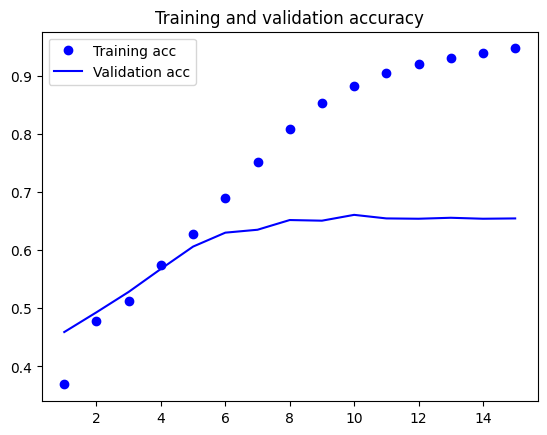

---
Training model with embeddings=8, optimizer=adam, epochs=20, batch_size=32
Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.3548 - loss: 2.5489 - val_acc: 0.4958 - val_loss: 1.8738
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5345 - loss: 1.7305 - val_acc: 0.5904 - val_loss: 1.6162
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6339 - loss: 1.3836 - val_acc: 0.6344 - val_loss: 1.4858
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7634 - loss: 0.9909 - val_acc: 0.6700 - val_loss: 1.3952
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8615 - loss: 0.6541 - val_acc: 0.6756 - val_loss: 1.3784
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9040 - loss: 0.4631 - val_acc: 0.6728 - val_loss: 1.4041
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9364 - loss: 0.3372 - val_acc: 0.6739 - val_loss: 1.4345
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9490 - loss: 0.2629 - val_acc: 0.6

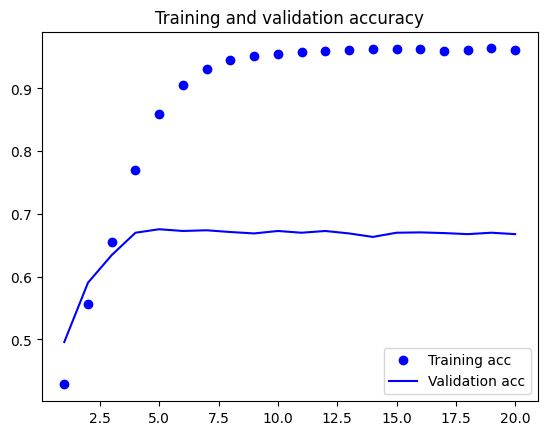

---
Training model with embeddings=8, optimizer=adam, epochs=20, batch_size=64
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.3124 - loss: 2.7573 - val_acc: 0.4908 - val_loss: 2.0069
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4916 - loss: 1.9280 - val_acc: 0.5270 - val_loss: 1.7999
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5686 - loss: 1.6109 - val_acc: 0.5782 - val_loss: 1.6300
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6440 - loss: 1.3524 - val_acc: 0.6166 - val_loss: 1.5297
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7291 - loss: 1.0834 - val_acc: 0.6505 - val_loss: 1.4559
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8172 - loss: 0.8154 - val_acc: 0.6667 - val_loss: 1.4178
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8750 - loss: 0.6040 - val_acc: 0.6667 - val_loss: 1.4158
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9078 - loss: 0.4644 - val_acc: 0.6

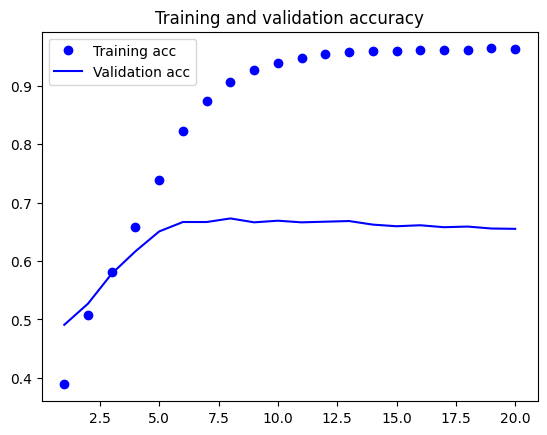

---
Training model with embeddings=8, optimizer=adam, epochs=20, batch_size=128
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.2672 - loss: 2.9680 - val_acc: 0.4213 - val_loss: 2.2081
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4616 - loss: 2.1154 - val_acc: 0.4891 - val_loss: 1.9519
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5106 - loss: 1.8240 - val_acc: 0.5186 - val_loss: 1.8173
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5472 - loss: 1.6720 - val_acc: 0.5715 - val_loss: 1.6991
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6234 - loss: 1.4584 - val_acc: 0.6027 - val_loss: 1.5901
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6708 - loss: 1.2639 - val_acc: 0.6388 - val_loss: 1.5125
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7414 - loss: 1.0426 - val_acc: 0.6528 - val_loss: 1.4556
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7928 - loss: 0.8746 - val_acc: 0.6544 - val_loss:

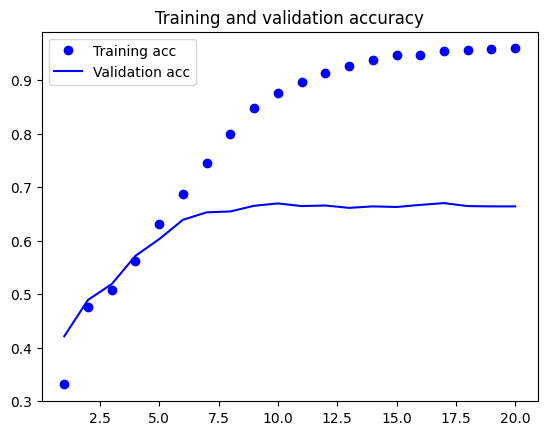

---
Training model with embeddings=16, optimizer=rmsprop, epochs=5, batch_size=32
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.3936 - loss: 2.4016 - val_acc: 0.5070 - val_loss: 1.8422
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5821 - loss: 1.6478 - val_acc: 0.6155 - val_loss: 1.5525
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6872 - loss: 1.2712 - val_acc: 0.6572 - val_loss: 1.4288
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7903 - loss: 0.9270 - val_acc: 0.6822 - val_loss: 1.3508
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8637 - loss: 0.6409 - val_acc: 0.6906 - val_loss: 1.3485


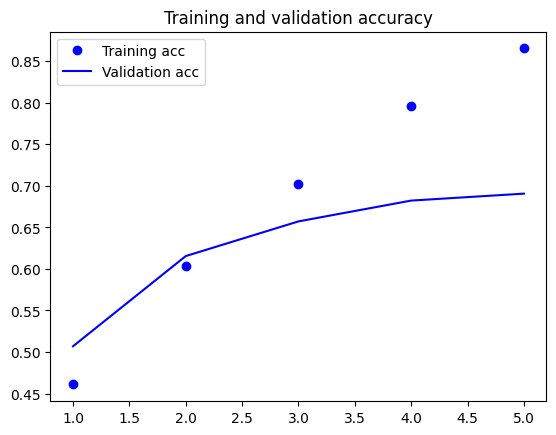

---
Training model with embeddings=16, optimizer=rmsprop, epochs=5, batch_size=64
Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.3752 - loss: 2.4940 - val_acc: 0.5086 - val_loss: 1.9683
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.5272 - loss: 1.8067 - val_acc: 0.5659 - val_loss: 1.6874
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.6322 - loss: 1.4741 - val_acc: 0.6021 - val_loss: 1.5873
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7014 - loss: 1.2144 - val_acc: 0.6439 - val_loss: 1.4353
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7863 - loss: 0.9360 - val_acc: 0.6828 - val_loss: 1.3570


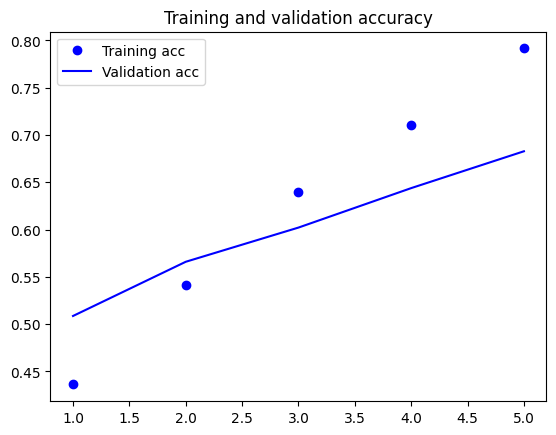

---
Training model with embeddings=16, optimizer=rmsprop, epochs=5, batch_size=128
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.3345 - loss: 2.6382 - val_acc: 0.4858 - val_loss: 2.0392
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.4932 - loss: 1.9772 - val_acc: 0.4875 - val_loss: 1.8966
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5419 - loss: 1.7279 - val_acc: 0.5910 - val_loss: 1.7379
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6175 - loss: 1.5241 - val_acc: 0.5915 - val_loss: 1.5943
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6700 - loss: 1.3461 - val_acc: 0.6099 - val_loss: 1.5321


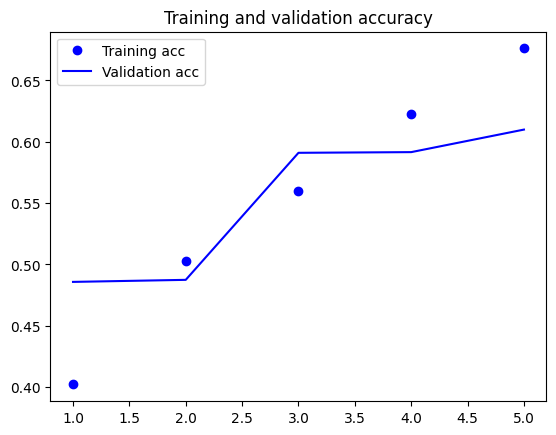

---
Training model with embeddings=16, optimizer=rmsprop, epochs=10, batch_size=32
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.3959 - loss: 2.3797 - val_acc: 0.5186 - val_loss: 1.8355
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5764 - loss: 1.6517 - val_acc: 0.6305 - val_loss: 1.5519
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6939 - loss: 1.2912 - val_acc: 0.6644 - val_loss: 1.4163
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7901 - loss: 0.9111 - val_acc: 0.6962 - val_loss: 1.3507
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8738 - loss: 0.6243 - val_acc: 0.6906 - val_loss: 1.3383
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9191 - loss: 0.4189 - val_acc: 0.6884 - val_loss: 1.3597
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9343 - loss: 0.3203 - val_acc: 0.6895 - val_loss: 1.4125
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9521 - loss: 0.2350 - val_acc:

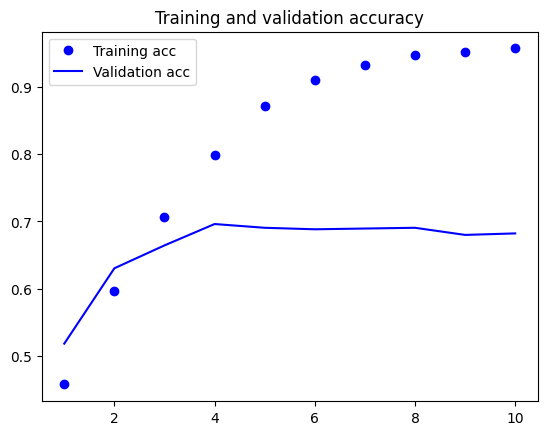

---
Training model with embeddings=16, optimizer=rmsprop, epochs=10, batch_size=64
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.3976 - loss: 2.4798 - val_acc: 0.5019 - val_loss: 1.9369
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.5137 - loss: 1.8416 - val_acc: 0.5698 - val_loss: 1.7236
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6198 - loss: 1.5081 - val_acc: 0.6316 - val_loss: 1.5358
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7023 - loss: 1.2098 - val_acc: 0.6572 - val_loss: 1.4418
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7913 - loss: 0.9343 - val_acc: 0.6784 - val_loss: 1.3779
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8473 - loss: 0.7017 - val_acc: 0.6756 - val_loss: 1.3578
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8895 - loss: 0.5311 - val_acc: 0.6800 - val_loss: 1.3630
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9158 - loss: 0.4162 - val_acc:

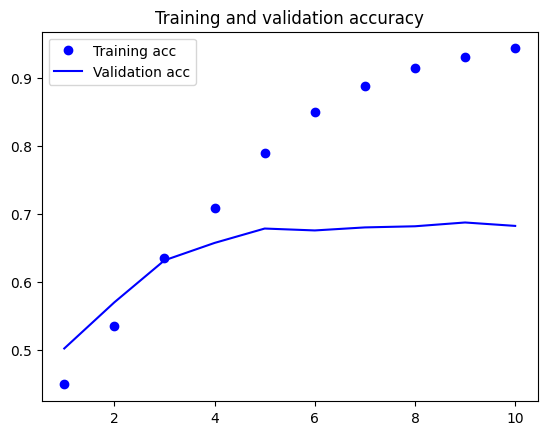

---
Training model with embeddings=16, optimizer=rmsprop, epochs=10, batch_size=128
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.3606 - loss: 2.5966 - val_acc: 0.4869 - val_loss: 2.0350
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5016 - loss: 1.9627 - val_acc: 0.5081 - val_loss: 1.8629
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5481 - loss: 1.7277 - val_acc: 0.5838 - val_loss: 1.7228
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.6267 - loss: 1.4934 - val_acc: 0.6299 - val_loss: 1.6045
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6834 - loss: 1.2864 - val_acc: 0.6377 - val_loss: 1.5425
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7397 - loss: 1.1084 - val_acc: 0.6533 - val_loss: 1.4601
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8023 - loss: 0.8799 - val_acc: 0.6617 - val_loss: 1.4350
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.8437 - loss: 0.7326 - val_acc: 0.6706 -

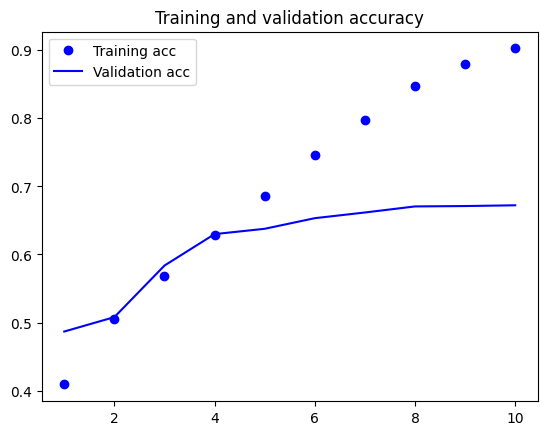

---
Training model with embeddings=16, optimizer=rmsprop, epochs=15, batch_size=32
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.3940 - loss: 2.3818 - val_acc: 0.5370 - val_loss: 1.8071
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5691 - loss: 1.6727 - val_acc: 0.6177 - val_loss: 1.5873
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6822 - loss: 1.2804 - val_acc: 0.6500 - val_loss: 1.4380
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7953 - loss: 0.9274 - val_acc: 0.6750 - val_loss: 1.3480
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8738 - loss: 0.6023 - val_acc: 0.6795 - val_loss: 1.3527
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9076 - loss: 0.4443 - val_acc: 0.6745 - val_loss: 1.3875
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9290 - loss: 0.3438 - val_acc: 0.6789 - val_loss: 1.4336
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9459 - loss: 0.2482 - val_acc:

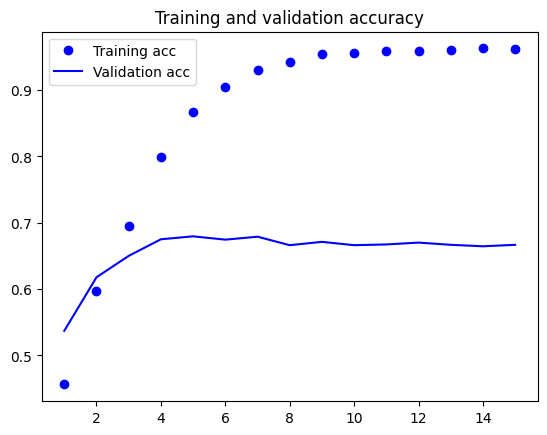

---
Training model with embeddings=16, optimizer=rmsprop, epochs=15, batch_size=64
Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.3749 - loss: 2.4878 - val_acc: 0.5086 - val_loss: 1.9966
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.5260 - loss: 1.8437 - val_acc: 0.5732 - val_loss: 1.7244
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.6175 - loss: 1.5155 - val_acc: 0.6183 - val_loss: 1.5811
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6937 - loss: 1.2616 - val_acc: 0.6544 - val_loss: 1.4539
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7846 - loss: 0.9479 - val_acc: 0.6756 - val_loss: 1.3895
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8545 - loss: 0.7053 - val_acc: 0.6784 - val_loss: 1.3713
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8972 - loss: 0.5197 - val_acc: 0.6739 - val_loss: 1.3998
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9144 - loss: 0.4096 - val_acc:

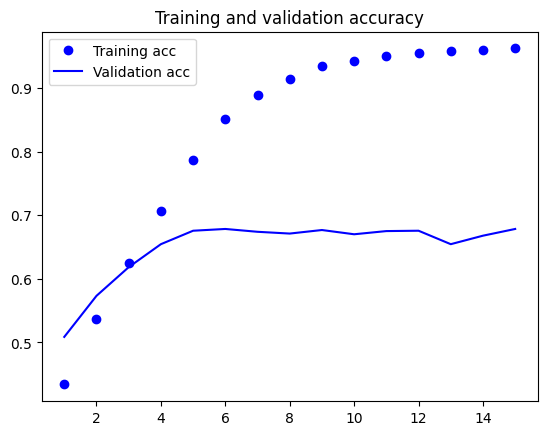

---
Training model with embeddings=16, optimizer=rmsprop, epochs=15, batch_size=128
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.3589 - loss: 2.6371 - val_acc: 0.4836 - val_loss: 2.0766
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4946 - loss: 1.9841 - val_acc: 0.5203 - val_loss: 1.8515
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5483 - loss: 1.7371 - val_acc: 0.5726 - val_loss: 1.7105
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6302 - loss: 1.4771 - val_acc: 0.5787 - val_loss: 1.6508
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6731 - loss: 1.3146 - val_acc: 0.6338 - val_loss: 1.4991
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7397 - loss: 1.0755 - val_acc: 0.6561 - val_loss: 1.4624
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8065 - loss: 0.8685 - val_acc: 0.6694 - val_loss: 1.4193
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8497 - loss: 0.7081 - val_acc: 0.6544 - val

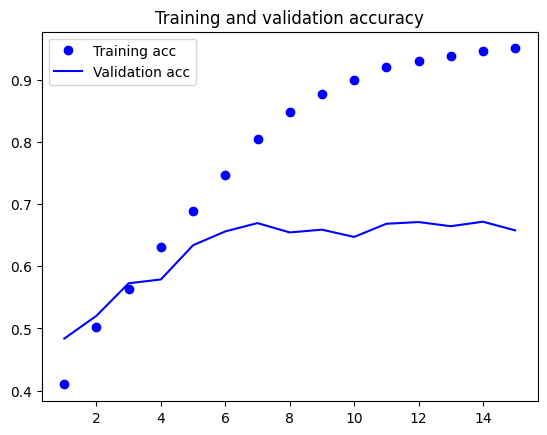

---
Training model with embeddings=16, optimizer=rmsprop, epochs=20, batch_size=32
Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.4048 - loss: 2.3673 - val_acc: 0.5498 - val_loss: 1.7988
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5764 - loss: 1.6481 - val_acc: 0.6149 - val_loss: 1.5666
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6924 - loss: 1.2586 - val_acc: 0.6572 - val_loss: 1.4131
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8033 - loss: 0.9157 - val_acc: 0.6667 - val_loss: 1.3731
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8637 - loss: 0.6357 - val_acc: 0.6822 - val_loss: 1.3488
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9093 - loss: 0.4475 - val_acc: 0.6817 - val_loss: 1.3895
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9320 - loss: 0.3248 - val_acc: 0.6795 - val_loss: 1.4312
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9470 - loss: 0.2500 - val_acc:

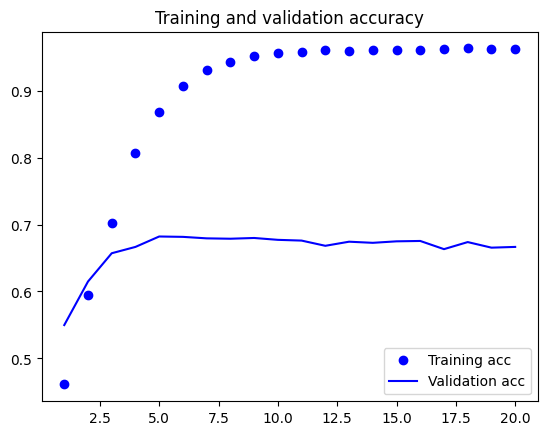

---
Training model with embeddings=16, optimizer=rmsprop, epochs=20, batch_size=64
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.3751 - loss: 2.4728 - val_acc: 0.4964 - val_loss: 1.9692
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.5138 - loss: 1.8490 - val_acc: 0.5587 - val_loss: 1.6825
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6194 - loss: 1.4922 - val_acc: 0.6233 - val_loss: 1.5350
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7082 - loss: 1.1927 - val_acc: 0.6455 - val_loss: 1.4371
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7902 - loss: 0.9260 - val_acc: 0.6683 - val_loss: 1.4257
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8543 - loss: 0.7088 - val_acc: 0.6611 - val_loss: 1.3912
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8881 - loss: 0.5280 - val_acc: 0.6700 - val_loss: 1.3939
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9211 - loss: 0.3925 - val_acc:

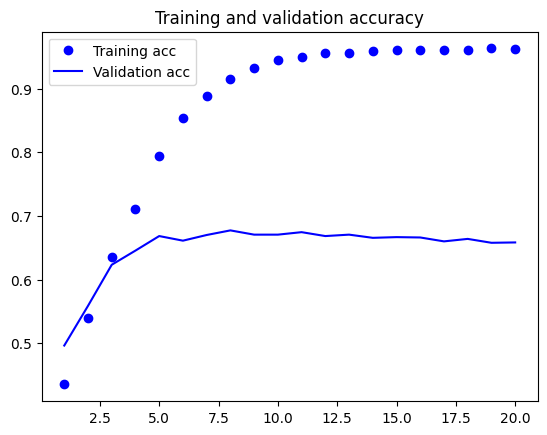

---
Training model with embeddings=16, optimizer=rmsprop, epochs=20, batch_size=128
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.3473 - loss: 2.6327 - val_acc: 0.4713 - val_loss: 2.0891
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.4861 - loss: 1.9812 - val_acc: 0.5192 - val_loss: 1.8715
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5495 - loss: 1.7316 - val_acc: 0.5715 - val_loss: 1.7303
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6222 - loss: 1.4980 - val_acc: 0.5865 - val_loss: 1.6089
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6851 - loss: 1.2671 - val_acc: 0.6244 - val_loss: 1.5442
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7376 - loss: 1.0963 - val_acc: 0.6361 - val_loss: 1.4826
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7919 - loss: 0.9177 - val_acc: 0.6477 - val_loss: 1.4397
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8470 - loss: 0.7170 - val_acc: 0.6733 - val

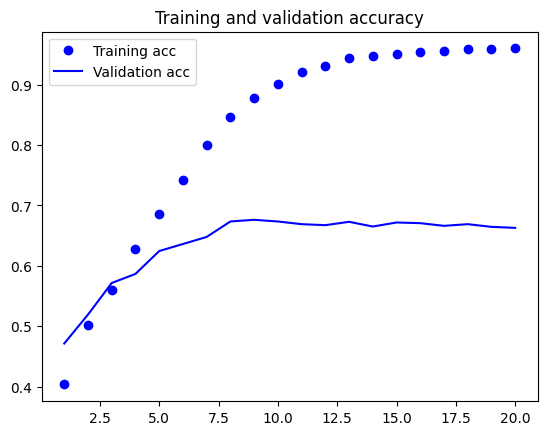

---
Training model with embeddings=16, optimizer=adam, epochs=5, batch_size=32
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3826 - loss: 2.4765 - val_acc: 0.5231 - val_loss: 1.7722
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5960 - loss: 1.5139 - val_acc: 0.6311 - val_loss: 1.4712
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7716 - loss: 0.9769 - val_acc: 0.6717 - val_loss: 1.3411
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8967 - loss: 0.5174 - val_acc: 0.6834 - val_loss: 1.3304
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9373 - loss: 0.3196 - val_acc: 0.6828 - val_loss: 1.3970


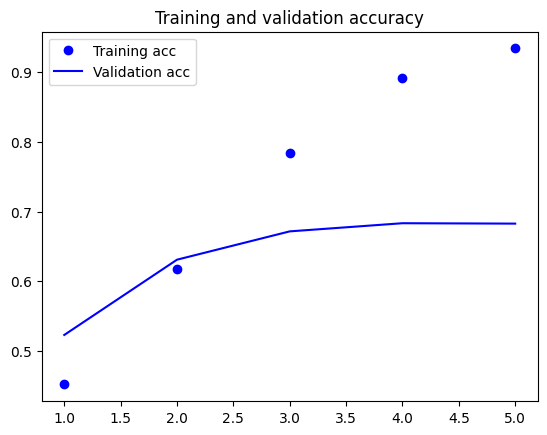

---
Training model with embeddings=16, optimizer=adam, epochs=5, batch_size=64
Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.3441 - loss: 2.6619 - val_acc: 0.4897 - val_loss: 1.9249
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5281 - loss: 1.7707 - val_acc: 0.5921 - val_loss: 1.6321
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6569 - loss: 1.3336 - val_acc: 0.6522 - val_loss: 1.4653
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7885 - loss: 0.9564 - val_acc: 0.6767 - val_loss: 1.3854
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8775 - loss: 0.6009 - val_acc: 0.6895 - val_loss: 1.3457


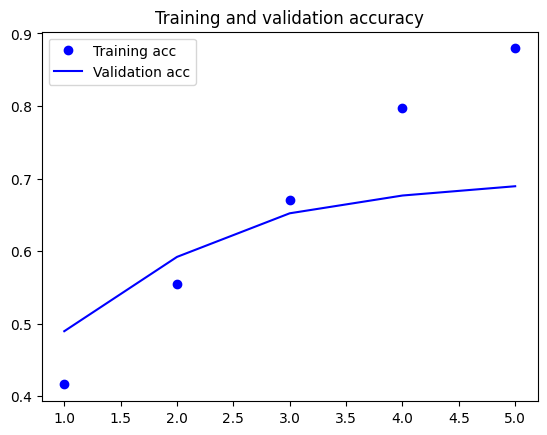

---
Training model with embeddings=16, optimizer=adam, epochs=5, batch_size=128
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3325 - loss: 2.8372 - val_acc: 0.4613 - val_loss: 2.0779
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4861 - loss: 1.9938 - val_acc: 0.5081 - val_loss: 1.8558
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5315 - loss: 1.7023 - val_acc: 0.5698 - val_loss: 1.6743
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6348 - loss: 1.3826 - val_acc: 0.6188 - val_loss: 1.5382
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7328 - loss: 1.1128 - val_acc: 0.6489 - val_loss: 1.4518


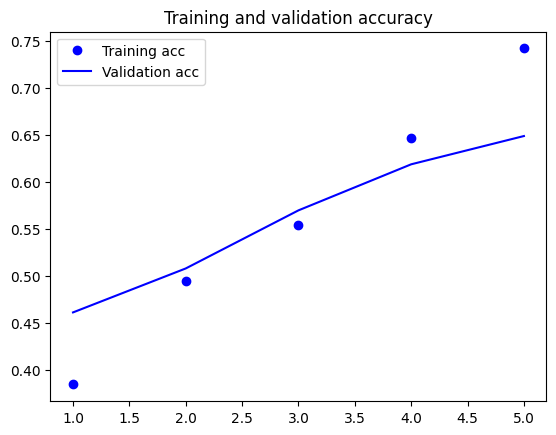

---
Training model with embeddings=16, optimizer=adam, epochs=10, batch_size=32
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3872 - loss: 2.4507 - val_acc: 0.5298 - val_loss: 1.7814
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5823 - loss: 1.5587 - val_acc: 0.6283 - val_loss: 1.4890
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7655 - loss: 0.9997 - val_acc: 0.6856 - val_loss: 1.3377
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8833 - loss: 0.5885 - val_acc: 0.6800 - val_loss: 1.3339
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9257 - loss: 0.3529 - val_acc: 0.6784 - val_loss: 1.3633
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9516 - loss: 0.2494 - val_acc: 0.6873 - val_loss: 1.4227
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9604 - loss: 0.1832 - val_acc: 0.6834 - val_loss: 1.4475
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9617 - loss: 0.1485 - val_acc: 0.

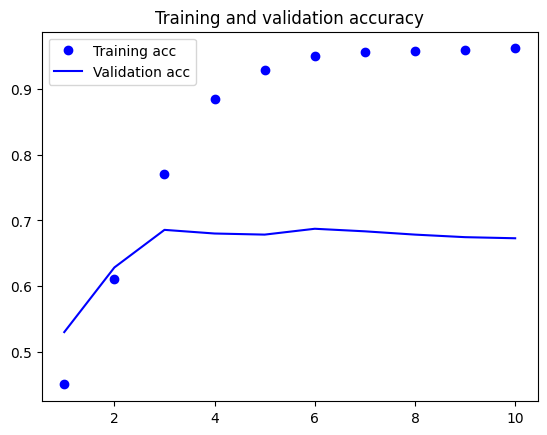

---
Training model with embeddings=16, optimizer=adam, epochs=10, batch_size=64
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.3451 - loss: 2.6748 - val_acc: 0.4891 - val_loss: 1.9086
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5330 - loss: 1.7360 - val_acc: 0.6093 - val_loss: 1.6186
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6563 - loss: 1.3406 - val_acc: 0.6516 - val_loss: 1.4459
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7943 - loss: 0.8870 - val_acc: 0.6717 - val_loss: 1.3544
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8849 - loss: 0.5699 - val_acc: 0.6811 - val_loss: 1.3447
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9224 - loss: 0.3943 - val_acc: 0.6856 - val_loss: 1.3796
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9461 - loss: 0.2827 - val_acc: 0.6878 - val_loss: 1.4228
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9548 - loss: 0.2204 - val_acc: 0.

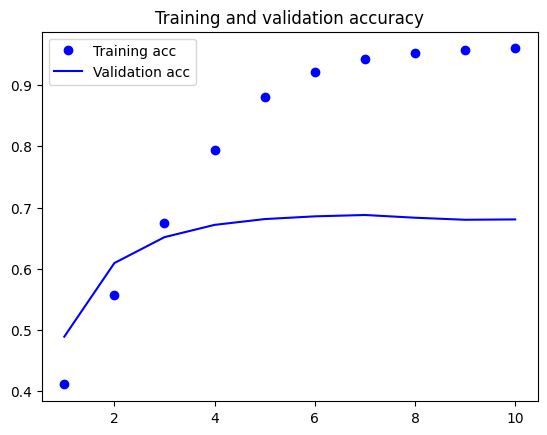

---
Training model with embeddings=16, optimizer=adam, epochs=10, batch_size=128
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3341 - loss: 2.8362 - val_acc: 0.4819 - val_loss: 2.0613
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4856 - loss: 1.9408 - val_acc: 0.5147 - val_loss: 1.8412
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5655 - loss: 1.6208 - val_acc: 0.5915 - val_loss: 1.6366
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6539 - loss: 1.3596 - val_acc: 0.6338 - val_loss: 1.5189
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7499 - loss: 1.0563 - val_acc: 0.6667 - val_loss: 1.4190
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8262 - loss: 0.7859 - val_acc: 0.6800 - val_loss: 1.3747
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8788 - loss: 0.5912 - val_acc: 0.6761 - val_loss: 1.3748
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9098 - loss: 0.4433 - val_acc: 0.6800 - val_loss

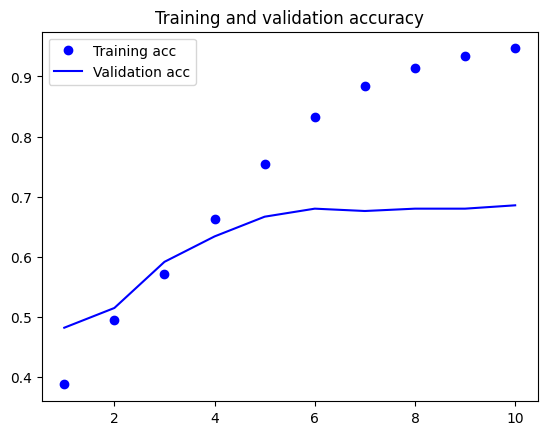

---
Training model with embeddings=16, optimizer=adam, epochs=15, batch_size=32
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3792 - loss: 2.5069 - val_acc: 0.5253 - val_loss: 1.7868
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5775 - loss: 1.6231 - val_acc: 0.6333 - val_loss: 1.5070
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7647 - loss: 1.0074 - val_acc: 0.6800 - val_loss: 1.3706
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8817 - loss: 0.5546 - val_acc: 0.6884 - val_loss: 1.3580
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9330 - loss: 0.3361 - val_acc: 0.6900 - val_loss: 1.4086
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9545 - loss: 0.2289 - val_acc: 0.6850 - val_loss: 1.4499
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9650 - loss: 0.1750 - val_acc: 0.6822 - val_loss: 1.5071
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9605 - loss: 0.1550 - val_acc: 0.

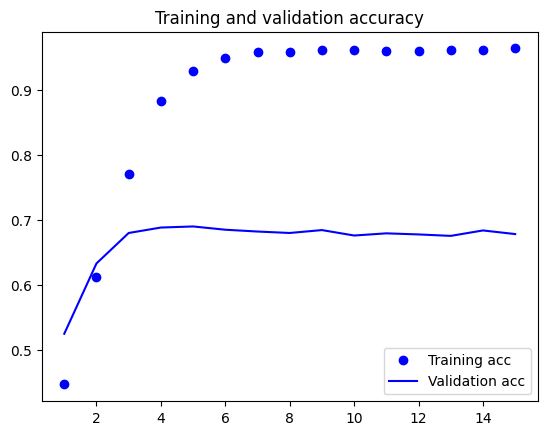

---
Training model with embeddings=16, optimizer=adam, epochs=15, batch_size=64
Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.3537 - loss: 2.6302 - val_acc: 0.4958 - val_loss: 1.9218
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.5199 - loss: 1.7980 - val_acc: 0.5804 - val_loss: 1.6487
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6358 - loss: 1.3820 - val_acc: 0.6377 - val_loss: 1.4771
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7770 - loss: 0.9822 - val_acc: 0.6667 - val_loss: 1.3909
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8742 - loss: 0.6080 - val_acc: 0.6745 - val_loss: 1.3738
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9253 - loss: 0.4109 - val_acc: 0.6817 - val_loss: 1.3859
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9425 - loss: 0.2894 - val_acc: 0.6800 - val_loss: 1.4166
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9527 - loss: 0.2299 - val_acc: 0.

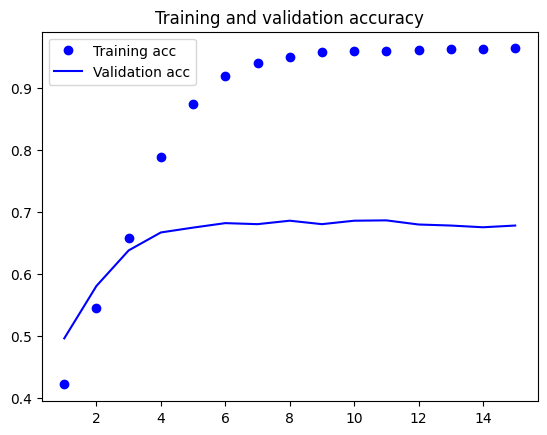

---
Training model with embeddings=16, optimizer=adam, epochs=15, batch_size=128
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.3123 - loss: 2.8559 - val_acc: 0.4725 - val_loss: 2.1013
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4847 - loss: 1.9680 - val_acc: 0.5109 - val_loss: 1.8660
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5347 - loss: 1.6987 - val_acc: 0.5632 - val_loss: 1.6841
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6379 - loss: 1.4071 - val_acc: 0.6266 - val_loss: 1.5463
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7252 - loss: 1.1341 - val_acc: 0.6589 - val_loss: 1.4388
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8149 - loss: 0.8164 - val_acc: 0.6745 - val_loss: 1.3838
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8779 - loss: 0.6105 - val_acc: 0.6756 - val_loss: 1.3750
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9132 - loss: 0.4579 - val_acc: 0.6745 - val_loss

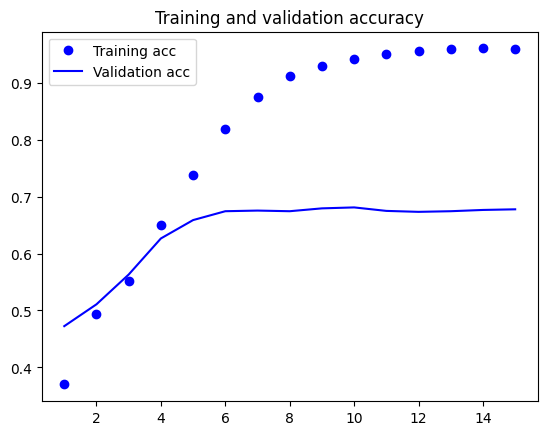

---
Training model with embeddings=16, optimizer=adam, epochs=20, batch_size=32
Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.3804 - loss: 2.4892 - val_acc: 0.5331 - val_loss: 1.7672
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5922 - loss: 1.5622 - val_acc: 0.6555 - val_loss: 1.4761
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7582 - loss: 1.0279 - val_acc: 0.6850 - val_loss: 1.3208
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8886 - loss: 0.5473 - val_acc: 0.6900 - val_loss: 1.3184
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9311 - loss: 0.3458 - val_acc: 0.6834 - val_loss: 1.3598
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9581 - loss: 0.2258 - val_acc: 0.6839 - val_loss: 1.4190
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9580 - loss: 0.1783 - val_acc: 0.6878 - val_loss: 1.4468
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9647 - loss: 0.1488 - val_acc: 0.

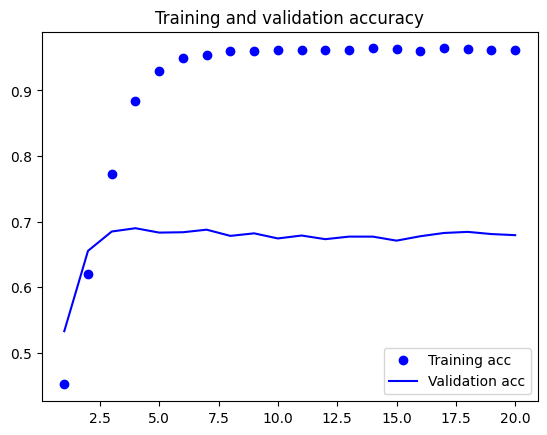

---
Training model with embeddings=16, optimizer=adam, epochs=20, batch_size=64
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.3417 - loss: 2.6757 - val_acc: 0.4981 - val_loss: 1.9368
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.5160 - loss: 1.8038 - val_acc: 0.5821 - val_loss: 1.6406
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6533 - loss: 1.3376 - val_acc: 0.6427 - val_loss: 1.4540
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7794 - loss: 0.9290 - val_acc: 0.6817 - val_loss: 1.3580
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8778 - loss: 0.6121 - val_acc: 0.6839 - val_loss: 1.3388
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9256 - loss: 0.3835 - val_acc: 0.6772 - val_loss: 1.3774
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9482 - loss: 0.2829 - val_acc: 0.6795 - val_loss: 1.4121
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9594 - loss: 0.2094 - val_acc: 0.

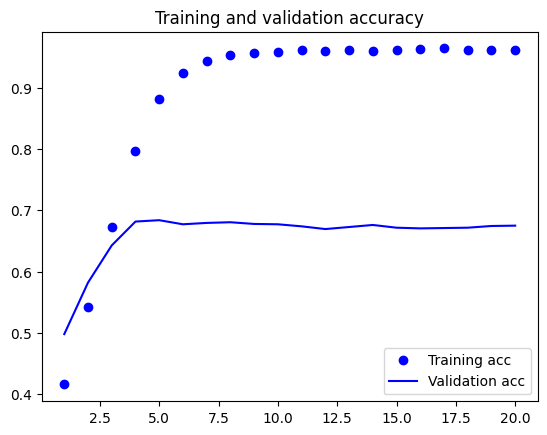

---
Training model with embeddings=16, optimizer=adam, epochs=20, batch_size=128
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.3171 - loss: 2.8624 - val_acc: 0.4786 - val_loss: 2.0824
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4813 - loss: 2.0086 - val_acc: 0.5120 - val_loss: 1.8439
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5566 - loss: 1.6638 - val_acc: 0.5832 - val_loss: 1.6557
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6463 - loss: 1.3812 - val_acc: 0.6316 - val_loss: 1.5191
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7285 - loss: 1.0832 - val_acc: 0.6633 - val_loss: 1.4352
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8372 - loss: 0.7637 - val_acc: 0.6667 - val_loss: 1.3896
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8842 - loss: 0.5930 - val_acc: 0.6717 - val_loss: 1.3822
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9163 - loss: 0.4383 - val_acc: 0.6722 - val_loss

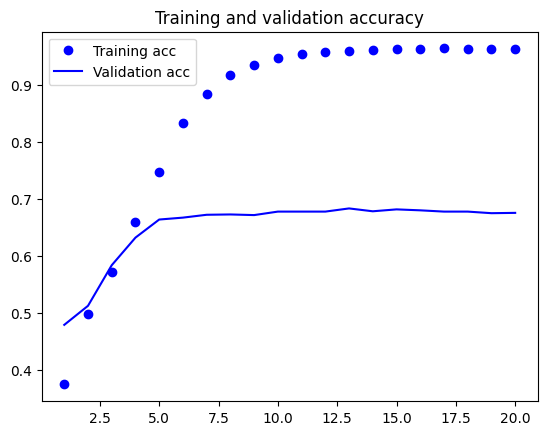

---
Training model with embeddings=32, optimizer=rmsprop, epochs=5, batch_size=32
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.4178 - loss: 2.3075 - val_acc: 0.5743 - val_loss: 1.7005
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.6311 - loss: 1.4944 - val_acc: 0.6450 - val_loss: 1.4686
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7733 - loss: 1.0012 - val_acc: 0.6739 - val_loss: 1.3354
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8813 - loss: 0.5702 - val_acc: 0.6834 - val_loss: 1.3280
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9296 - loss: 0.3510 - val_acc: 0.6828 - val_loss: 1.3877


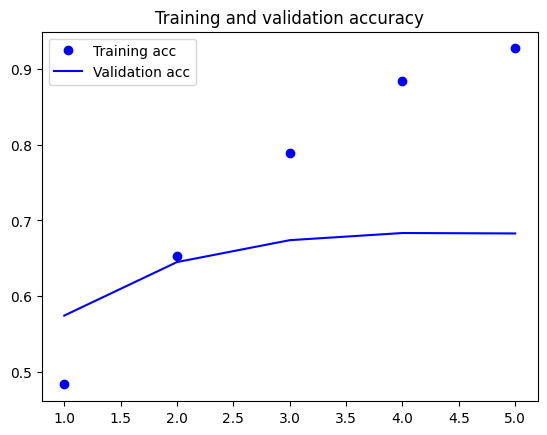

---
Training model with embeddings=32, optimizer=rmsprop, epochs=5, batch_size=64
Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.3924 - loss: 2.4097 - val_acc: 0.5047 - val_loss: 1.8622
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5597 - loss: 1.6957 - val_acc: 0.5854 - val_loss: 1.9948
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6812 - loss: 1.3126 - val_acc: 0.6550 - val_loss: 1.4422
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8118 - loss: 0.8779 - val_acc: 0.6411 - val_loss: 1.4333
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8822 - loss: 0.5717 - val_acc: 0.6728 - val_loss: 1.3760


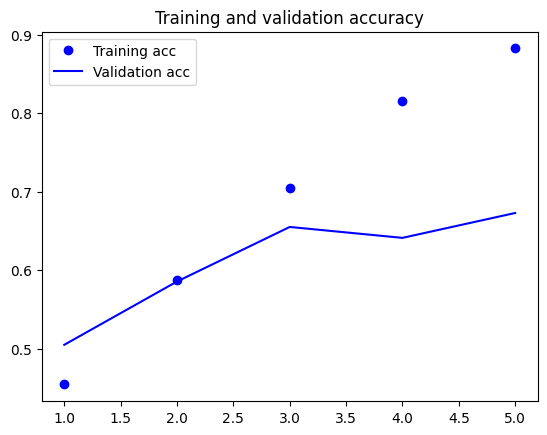

---
Training model with embeddings=32, optimizer=rmsprop, epochs=5, batch_size=128
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.3601 - loss: 2.5390 - val_acc: 0.5064 - val_loss: 1.9887
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.5113 - loss: 1.8840 - val_acc: 0.5760 - val_loss: 1.7706
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6033 - loss: 1.5780 - val_acc: 0.6055 - val_loss: 1.6202
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6781 - loss: 1.2884 - val_acc: 0.6361 - val_loss: 1.5067
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.7652 - loss: 1.0341 - val_acc: 0.6544 - val_loss: 1.4368


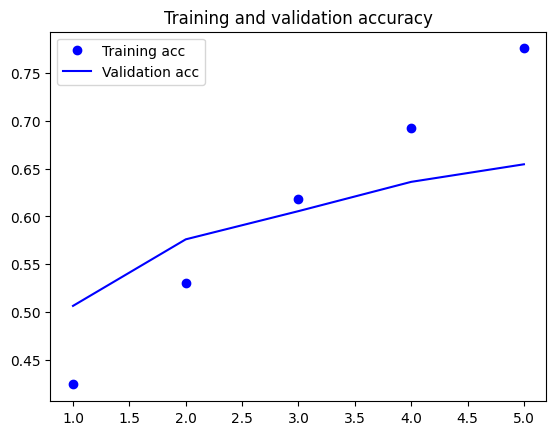

---
Training model with embeddings=32, optimizer=rmsprop, epochs=10, batch_size=32
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.4285 - loss: 2.2823 - val_acc: 0.5715 - val_loss: 1.6972
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.6344 - loss: 1.4670 - val_acc: 0.6628 - val_loss: 1.4377
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.7867 - loss: 0.9593 - val_acc: 0.6761 - val_loss: 1.3447
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8901 - loss: 0.5617 - val_acc: 0.6839 - val_loss: 1.3479
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9316 - loss: 0.3438 - val_acc: 0.6828 - val_loss: 1.3896
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.9526 - loss: 0.2465 - val_acc: 0.6767 - val_loss: 1.4652
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9580 - loss: 0.1815 - val_acc: 0.6784 - val_loss: 1.4974
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9615 - loss: 0.1554 - val_acc:

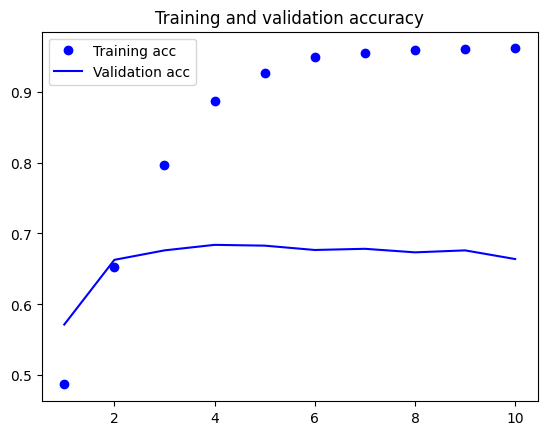

---
Training model with embeddings=32, optimizer=rmsprop, epochs=10, batch_size=64
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.3921 - loss: 2.4228 - val_acc: 0.5142 - val_loss: 1.8403
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5568 - loss: 1.6849 - val_acc: 0.5949 - val_loss: 1.6182
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6933 - loss: 1.2769 - val_acc: 0.6511 - val_loss: 1.4459
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.8049 - loss: 0.8939 - val_acc: 0.6678 - val_loss: 1.3671
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8813 - loss: 0.5716 - val_acc: 0.6800 - val_loss: 1.3635
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9295 - loss: 0.3719 - val_acc: 0.6683 - val_loss: 1.4144
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9406 - loss: 0.2856 - val_acc: 0.6733 - val_loss: 1.4553
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9586 - loss: 0.2047 - val_ac

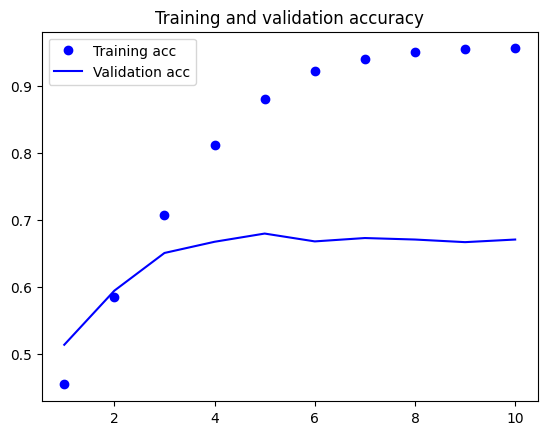

---
Training model with embeddings=32, optimizer=rmsprop, epochs=10, batch_size=128
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.3669 - loss: 2.5558 - val_acc: 0.5036 - val_loss: 1.9789
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.5199 - loss: 1.8436 - val_acc: 0.5543 - val_loss: 1.7582
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.6096 - loss: 1.5272 - val_acc: 0.6199 - val_loss: 1.6021
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.6906 - loss: 1.2535 - val_acc: 0.6255 - val_loss: 1.5021
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7620 - loss: 1.0098 - val_acc: 0.6589 - val_loss: 1.4880
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.8445 - loss: 0.7322 - val_acc: 0.6572 - val_loss: 1.4140
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.8851 - loss: 0.5456 - val_acc: 0.6650 - val_loss: 1.4309
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9260 - loss: 0.3822 - val_acc: 0.6683

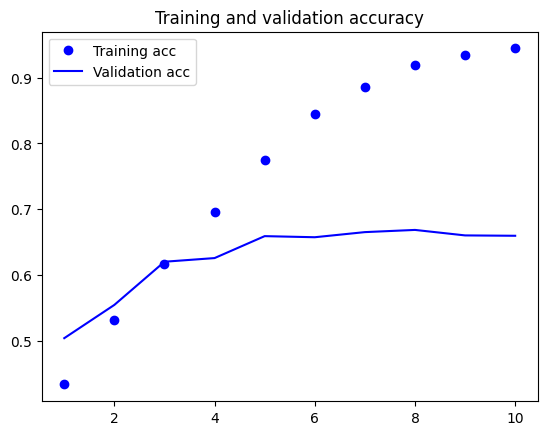

---
Training model with embeddings=32, optimizer=rmsprop, epochs=15, batch_size=32
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.4227 - loss: 2.2866 - val_acc: 0.5648 - val_loss: 1.7592
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.6371 - loss: 1.4608 - val_acc: 0.6561 - val_loss: 1.4402
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7845 - loss: 0.9582 - val_acc: 0.6784 - val_loss: 1.3325
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8868 - loss: 0.5482 - val_acc: 0.6739 - val_loss: 1.3651
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9284 - loss: 0.3602 - val_acc: 0.6861 - val_loss: 1.3882
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9474 - loss: 0.2434 - val_acc: 0.6789 - val_loss: 1.4688
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9572 - loss: 0.1826 - val_acc: 0.6806 - val_loss: 1.5021
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9593 - loss: 0.1544 - val_acc:

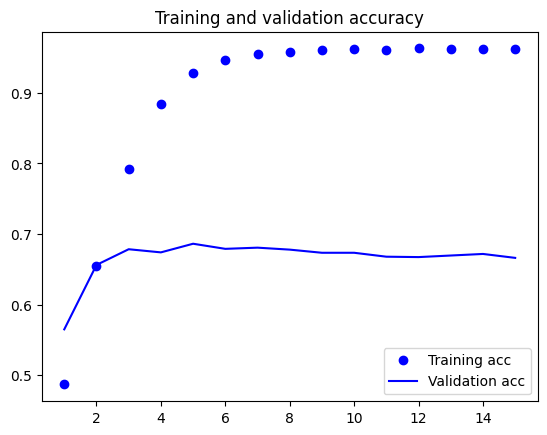

---
Training model with embeddings=32, optimizer=rmsprop, epochs=15, batch_size=64
Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.3964 - loss: 2.4239 - val_acc: 0.5125 - val_loss: 1.8581
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5668 - loss: 1.6894 - val_acc: 0.6071 - val_loss: 1.5788
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6943 - loss: 1.2437 - val_acc: 0.6522 - val_loss: 1.4973
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.8065 - loss: 0.8684 - val_acc: 0.6433 - val_loss: 1.4161
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8787 - loss: 0.5752 - val_acc: 0.6717 - val_loss: 1.3921
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9246 - loss: 0.3776 - val_acc: 0.6756 - val_loss: 1.4090
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9446 - loss: 0.2844 - val_acc: 0.6745 - val_loss: 1.4441
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9564 - loss: 0.2141 - val_

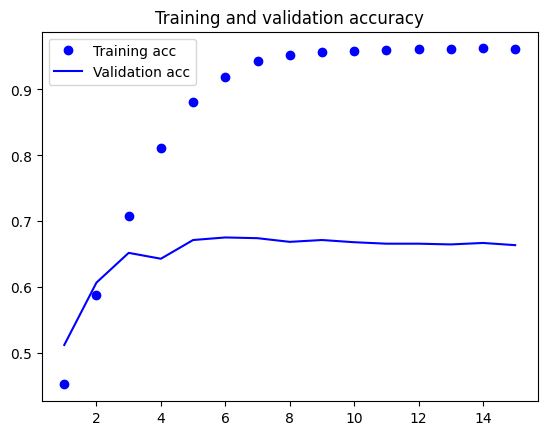

---
Training model with embeddings=32, optimizer=rmsprop, epochs=15, batch_size=128
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.3644 - loss: 2.5560 - val_acc: 0.4964 - val_loss: 2.0012
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.5098 - loss: 1.8739 - val_acc: 0.5209 - val_loss: 1.7987
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.6018 - loss: 1.5559 - val_acc: 0.6038 - val_loss: 1.6226
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.6771 - loss: 1.2923 - val_acc: 0.6494 - val_loss: 1.5015
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.7717 - loss: 1.0023 - val_acc: 0.6322 - val_loss: 1.4582
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.8359 - loss: 0.7581 - val_acc: 0.6528 - val_loss: 1.4496
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.8908 - loss: 0.5392 - val_acc: 0.6455 - val_loss: 1.4652
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9252 - loss: 0.3943 - val_acc: 0.6600

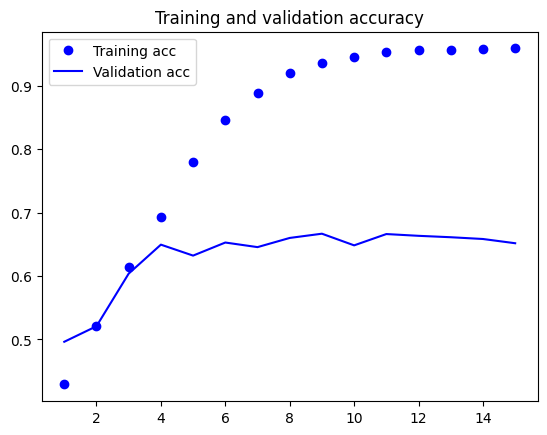

---
Training model with embeddings=32, optimizer=rmsprop, epochs=20, batch_size=32
Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.4326 - loss: 2.2615 - val_acc: 0.5665 - val_loss: 1.6847
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.6231 - loss: 1.5103 - val_acc: 0.6572 - val_loss: 1.4597
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.7802 - loss: 0.9488 - val_acc: 0.6828 - val_loss: 1.3422
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8827 - loss: 0.5618 - val_acc: 0.6800 - val_loss: 1.3357
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9320 - loss: 0.3515 - val_acc: 0.6856 - val_loss: 1.3754
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.9543 - loss: 0.2311 - val_acc: 0.6800 - val_loss: 1.4304
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9617 - loss: 0.1717 - val_acc: 0.6839 - val_loss: 1.4754
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.9628 - loss: 0.1461 - val_acc:

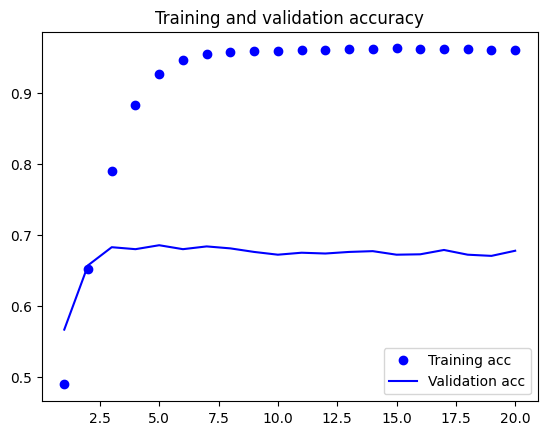

---
Training model with embeddings=32, optimizer=rmsprop, epochs=20, batch_size=64
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.3872 - loss: 2.4097 - val_acc: 0.5398 - val_loss: 1.8723
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5606 - loss: 1.6759 - val_acc: 0.5915 - val_loss: 1.5873
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6912 - loss: 1.2456 - val_acc: 0.6511 - val_loss: 1.4596
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.7995 - loss: 0.8880 - val_acc: 0.6639 - val_loss: 1.3827
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8753 - loss: 0.5924 - val_acc: 0.6706 - val_loss: 1.4475
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9208 - loss: 0.3905 - val_acc: 0.6767 - val_loss: 1.3864
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9430 - loss: 0.2794 - val_acc: 0.6822 - val_loss: 1.4246
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9559 - loss: 0.2083 - val

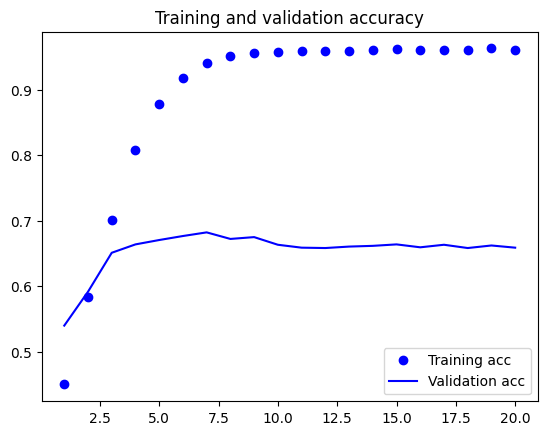

---
Training model with embeddings=32, optimizer=rmsprop, epochs=20, batch_size=128
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.3647 - loss: 2.5616 - val_acc: 0.4864 - val_loss: 2.0432
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.5006 - loss: 1.8918 - val_acc: 0.5275 - val_loss: 1.7603
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.6050 - loss: 1.5433 - val_acc: 0.5977 - val_loss: 1.6111
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6865 - loss: 1.2565 - val_acc: 0.6372 - val_loss: 1.4851
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.7650 - loss: 1.0045 - val_acc: 0.6561 - val_loss: 1.4274
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.8351 - loss: 0.7478 - val_acc: 0.6461 - val_loss: 1.4101
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.8909 - loss: 0.5315 - val_acc: 0.6416 - val_loss: 1.4964
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9211 - loss: 0.3972 - val_acc: 0.6494

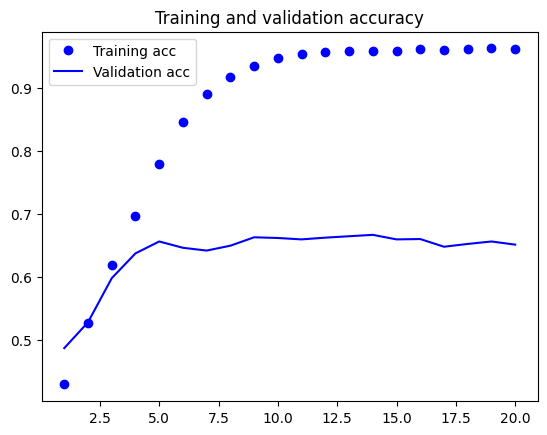

---
Training model with embeddings=32, optimizer=adam, epochs=5, batch_size=32
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.3972 - loss: 2.3819 - val_acc: 0.5832 - val_loss: 1.6332
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.6770 - loss: 1.2902 - val_acc: 0.6950 - val_loss: 1.3164
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8835 - loss: 0.5831 - val_acc: 0.6973 - val_loss: 1.2751
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9440 - loss: 0.2903 - val_acc: 0.7028 - val_loss: 1.3305
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9599 - loss: 0.2103 - val_acc: 0.6873 - val_loss: 1.4317


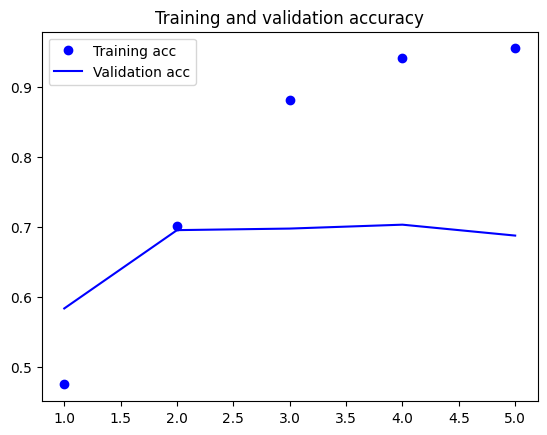

---
Training model with embeddings=32, optimizer=adam, epochs=5, batch_size=64
Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.3765 - loss: 2.5622 - val_acc: 0.5248 - val_loss: 1.8330
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5693 - loss: 1.6200 - val_acc: 0.6160 - val_loss: 1.5164
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7618 - loss: 1.0194 - val_acc: 0.6750 - val_loss: 1.3554
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8932 - loss: 0.5355 - val_acc: 0.6889 - val_loss: 1.3458
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9440 - loss: 0.3147 - val_acc: 0.6917 - val_loss: 1.3937


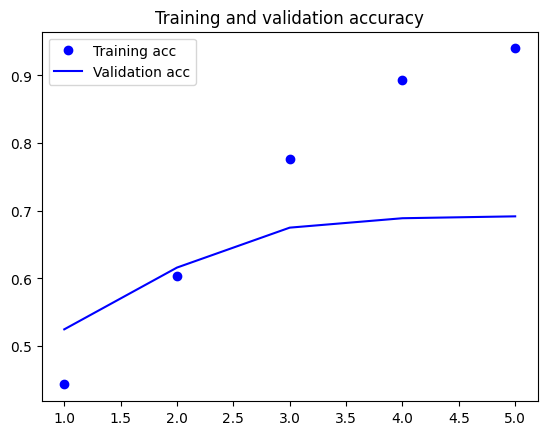

---
Training model with embeddings=32, optimizer=adam, epochs=5, batch_size=128
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.3408 - loss: 2.7185 - val_acc: 0.4830 - val_loss: 1.9790
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.4928 - loss: 1.8474 - val_acc: 0.5448 - val_loss: 1.7182
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6132 - loss: 1.4424 - val_acc: 0.6244 - val_loss: 1.5189
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.7679 - loss: 1.0187 - val_acc: 0.6689 - val_loss: 1.4006
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8723 - loss: 0.6550 - val_acc: 0.6778 - val_loss: 1.3460


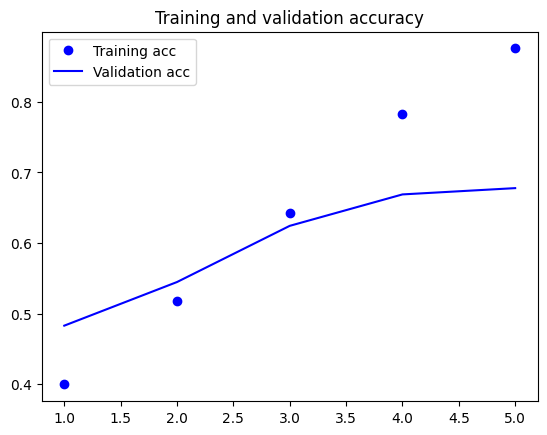

---
Training model with embeddings=32, optimizer=adam, epochs=10, batch_size=32
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.3932 - loss: 2.3931 - val_acc: 0.5904 - val_loss: 1.6318
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.6574 - loss: 1.3241 - val_acc: 0.6856 - val_loss: 1.3429
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8740 - loss: 0.5999 - val_acc: 0.6917 - val_loss: 1.2993
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9468 - loss: 0.2826 - val_acc: 0.6873 - val_loss: 1.3549
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9579 - loss: 0.1982 - val_acc: 0.6967 - val_loss: 1.4089
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9672 - loss: 0.1507 - val_acc: 0.6850 - val_loss: 1.4499
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9644 - loss: 0.1468 - val_acc: 0.6906 - val_loss: 1.4382
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9657 - loss: 0.1377 - val_acc: 0.

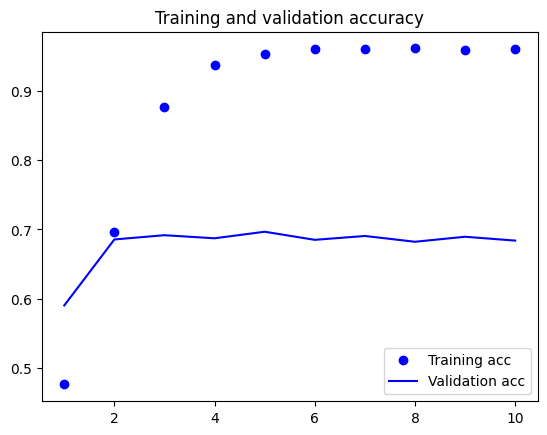

---
Training model with embeddings=32, optimizer=adam, epochs=10, batch_size=64
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.3889 - loss: 2.5431 - val_acc: 0.5275 - val_loss: 1.8239
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.5748 - loss: 1.6131 - val_acc: 0.6221 - val_loss: 1.5069
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.7665 - loss: 0.9997 - val_acc: 0.6789 - val_loss: 1.3347
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9036 - loss: 0.4937 - val_acc: 0.6928 - val_loss: 1.3427
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9415 - loss: 0.3188 - val_acc: 0.6878 - val_loss: 1.3637
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9558 - loss: 0.2222 - val_acc: 0.6956 - val_loss: 1.3840
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9621 - loss: 0.1667 - val_acc: 0.6878 - val_loss: 1.4440
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9619 - loss: 0.1483 - val_acc: 0.

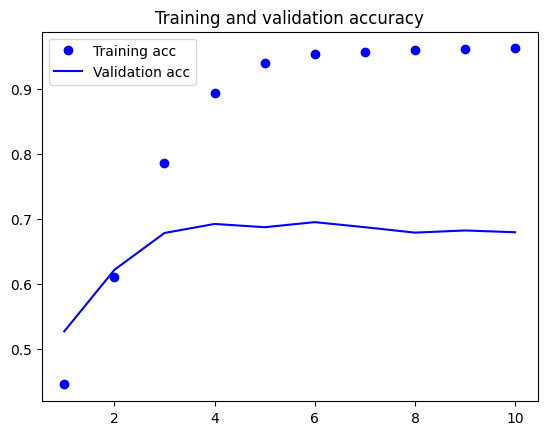

---
Training model with embeddings=32, optimizer=adam, epochs=10, batch_size=128
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.3456 - loss: 2.7328 - val_acc: 0.4925 - val_loss: 1.9791
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5063 - loss: 1.8353 - val_acc: 0.5448 - val_loss: 1.7074
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6260 - loss: 1.4248 - val_acc: 0.6361 - val_loss: 1.5011
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7694 - loss: 0.9895 - val_acc: 0.6750 - val_loss: 1.3730
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.8681 - loss: 0.6237 - val_acc: 0.6839 - val_loss: 1.3320
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9191 - loss: 0.4173 - val_acc: 0.6867 - val_loss: 1.3377
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9504 - loss: 0.2890 - val_acc: 0.6917 - val_loss: 1.3710
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9535 - loss: 0.2209 - val_acc: 0.6845 - v

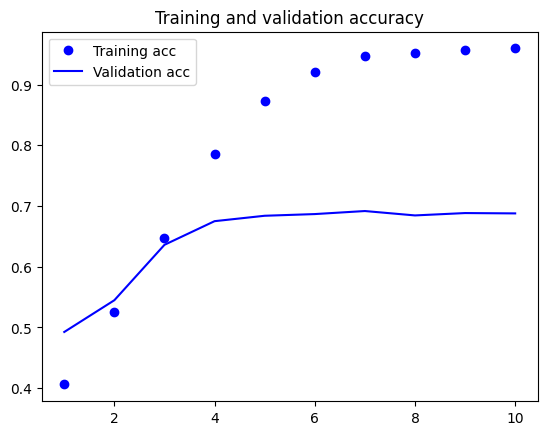

---
Training model with embeddings=32, optimizer=adam, epochs=15, batch_size=32
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.4012 - loss: 2.3689 - val_acc: 0.5838 - val_loss: 1.6412
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.6735 - loss: 1.2766 - val_acc: 0.6884 - val_loss: 1.3176
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8804 - loss: 0.5837 - val_acc: 0.7034 - val_loss: 1.2737
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9457 - loss: 0.2877 - val_acc: 0.7045 - val_loss: 1.3297
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9639 - loss: 0.1995 - val_acc: 0.7017 - val_loss: 1.3950
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9629 - loss: 0.1664 - val_acc: 0.6967 - val_loss: 1.4283
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9673 - loss: 0.1444 - val_acc: 0.6900 - val_loss: 1.4507
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9683 - loss: 0.1223 - val_acc: 0.

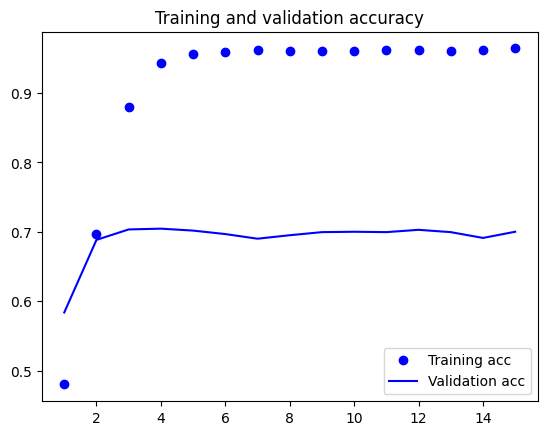

---
Training model with embeddings=32, optimizer=adam, epochs=15, batch_size=64
Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.3623 - loss: 2.5707 - val_acc: 0.5097 - val_loss: 1.8091
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.5890 - loss: 1.5771 - val_acc: 0.6416 - val_loss: 1.4819
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7681 - loss: 0.9731 - val_acc: 0.6895 - val_loss: 1.3222
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8934 - loss: 0.5314 - val_acc: 0.6923 - val_loss: 1.3125
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9391 - loss: 0.3270 - val_acc: 0.6889 - val_loss: 1.3636
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9599 - loss: 0.2132 - val_acc: 0.6867 - val_loss: 1.4133
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9601 - loss: 0.1719 - val_acc: 0.6850 - val_loss: 1.4601
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9600 - loss: 0.1533 - val_acc: 0.

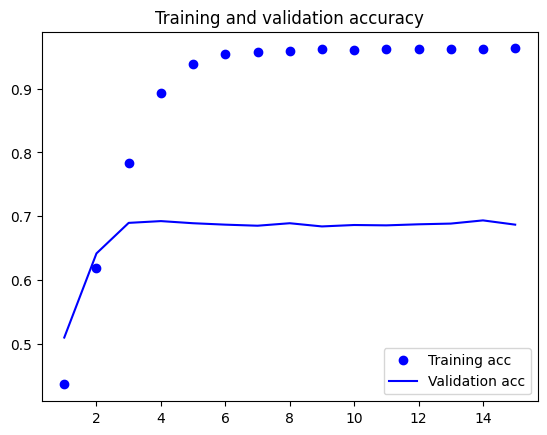

---
Training model with embeddings=32, optimizer=adam, epochs=15, batch_size=128
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.3349 - loss: 2.7272 - val_acc: 0.4897 - val_loss: 1.9802
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5009 - loss: 1.8451 - val_acc: 0.5504 - val_loss: 1.7184
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6278 - loss: 1.4475 - val_acc: 0.6116 - val_loss: 1.5213
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.7632 - loss: 1.0098 - val_acc: 0.6700 - val_loss: 1.3920
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8632 - loss: 0.6461 - val_acc: 0.6884 - val_loss: 1.3482
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9227 - loss: 0.4281 - val_acc: 0.6884 - val_loss: 1.3553
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9425 - loss: 0.3068 - val_acc: 0.6895 - val_loss: 1.3840
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9565 - loss: 0.2235 - val_acc: 0.6861 - 

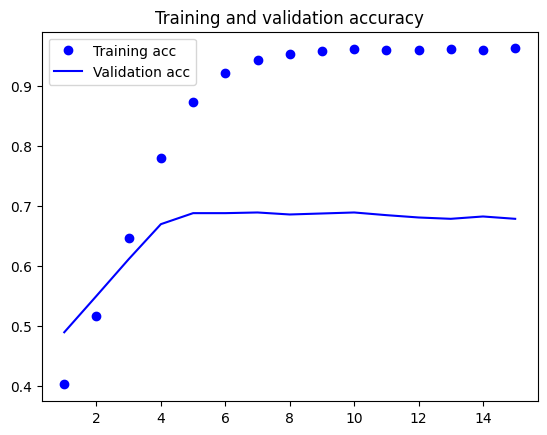

---
Training model with embeddings=32, optimizer=adam, epochs=20, batch_size=32
Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.4007 - loss: 2.3395 - val_acc: 0.6004 - val_loss: 1.6463
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.6809 - loss: 1.2780 - val_acc: 0.6867 - val_loss: 1.3278
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8787 - loss: 0.5960 - val_acc: 0.6834 - val_loss: 1.3111
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9406 - loss: 0.2993 - val_acc: 0.6850 - val_loss: 1.3993
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9603 - loss: 0.2024 - val_acc: 0.6923 - val_loss: 1.4177
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9664 - loss: 0.1606 - val_acc: 0.6867 - val_loss: 1.4845
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9600 - loss: 0.1649 - val_acc: 0.6795 - val_loss: 1.4774
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9633 - loss: 0.1405 - val_acc: 0.

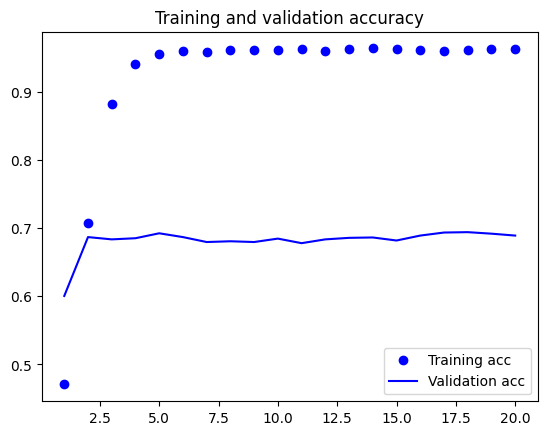

---
Training model with embeddings=32, optimizer=adam, epochs=20, batch_size=64
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.3715 - loss: 2.5303 - val_acc: 0.5181 - val_loss: 1.8252
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5748 - loss: 1.5862 - val_acc: 0.6272 - val_loss: 1.5011
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.7592 - loss: 1.0130 - val_acc: 0.6884 - val_loss: 1.3208
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9058 - loss: 0.5111 - val_acc: 0.6889 - val_loss: 1.3082
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9464 - loss: 0.2991 - val_acc: 0.6950 - val_loss: 1.3548
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9611 - loss: 0.2045 - val_acc: 0.6978 - val_loss: 1.3797
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9675 - loss: 0.1566 - val_acc: 0.6939 - val_loss: 1.4341
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9611 - loss: 0.1499 - val_acc: 0

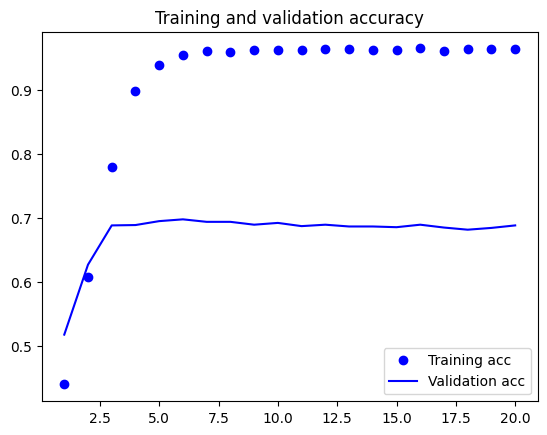

---
Training model with embeddings=32, optimizer=adam, epochs=20, batch_size=128
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.3489 - loss: 2.7172 - val_acc: 0.4903 - val_loss: 1.9382
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5235 - loss: 1.7600 - val_acc: 0.5671 - val_loss: 1.6841
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.6424 - loss: 1.3869 - val_acc: 0.6461 - val_loss: 1.5065
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.7820 - loss: 0.9764 - val_acc: 0.6800 - val_loss: 1.3927
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8827 - loss: 0.6102 - val_acc: 0.6889 - val_loss: 1.3556
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9249 - loss: 0.4075 - val_acc: 0.6884 - val_loss: 1.3615
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9515 - loss: 0.2765 - val_acc: 0.6784 - val_loss: 1.4001
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9561 - loss: 0.2206 - val_acc: 0.6889 - 

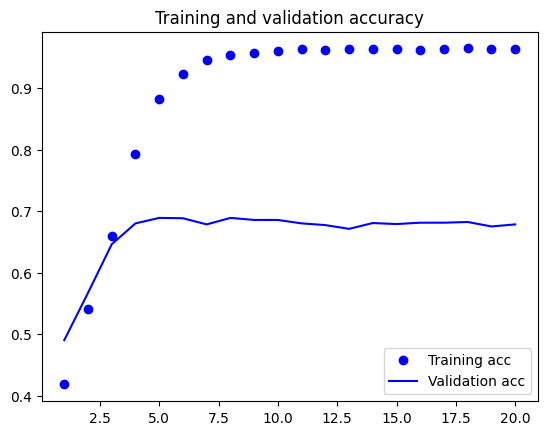

---
Training model with embeddings=64, optimizer=rmsprop, epochs=5, batch_size=32
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.4463 - loss: 2.2165 - val_acc: 0.6049 - val_loss: 1.6765
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.7032 - loss: 1.2497 - val_acc: 0.6784 - val_loss: 1.3516
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.8692 - loss: 0.6371 - val_acc: 0.6822 - val_loss: 1.3172
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9383 - loss: 0.3200 - val_acc: 0.6778 - val_loss: 1.3752
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9596 - loss: 0.1972 - val_acc: 0.6750 - val_loss: 1.4441


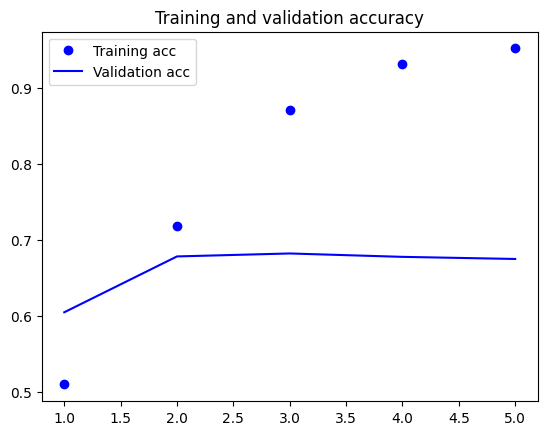

---
Training model with embeddings=64, optimizer=rmsprop, epochs=5, batch_size=64
Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.4056 - loss: 2.3202 - val_acc: 0.5353 - val_loss: 1.7445
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.6218 - loss: 1.4891 - val_acc: 0.6439 - val_loss: 1.4998
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.7895 - loss: 0.9258 - val_acc: 0.6728 - val_loss: 1.3664
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.8861 - loss: 0.5335 - val_acc: 0.6711 - val_loss: 1.3849
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.9355 - loss: 0.3310 - val_acc: 0.6706 - val_loss: 1.4640


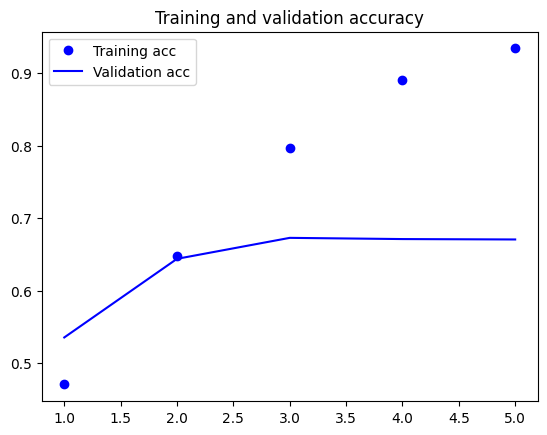

---
Training model with embeddings=64, optimizer=rmsprop, epochs=5, batch_size=128
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.3805 - loss: 2.5307 - val_acc: 0.5120 - val_loss: 1.9200
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.5456 - loss: 1.7467 - val_acc: 0.5876 - val_loss: 1.6858
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.6689 - loss: 1.3561 - val_acc: 0.6349 - val_loss: 1.5361
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7862 - loss: 0.9614 - val_acc: 0.6472 - val_loss: 1.4643
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8723 - loss: 0.6144 - val_acc: 0.6561 - val_loss: 1.4238


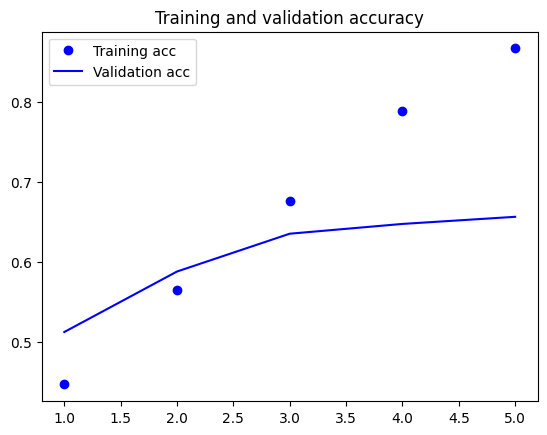

---
Training model with embeddings=64, optimizer=rmsprop, epochs=10, batch_size=32
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - acc: 0.4333 - loss: 2.2265 - val_acc: 0.6088 - val_loss: 1.5970
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.6901 - loss: 1.2697 - val_acc: 0.6750 - val_loss: 1.3576
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.8634 - loss: 0.6563 - val_acc: 0.6895 - val_loss: 1.3528
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.9322 - loss: 0.3332 - val_acc: 0.6817 - val_loss: 1.3967
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.9563 - loss: 0.2151 - val_acc: 0.6800 - val_loss: 1.4728
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.9648 - loss: 0.1590 - val_acc: 0.6700 - val_loss: 1.5450
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9621 - loss: 0.1499 - val_acc: 0.6717 - val_loss: 1.5883
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9679 - loss: 0.1200 - 

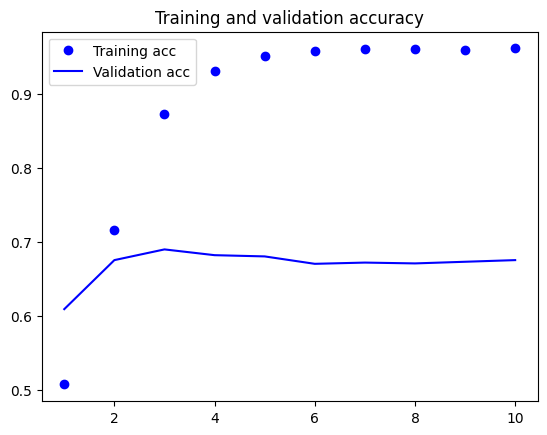

---
Training model with embeddings=64, optimizer=rmsprop, epochs=10, batch_size=64
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - acc: 0.4054 - loss: 2.3669 - val_acc: 0.5687 - val_loss: 1.8811
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.6267 - loss: 1.4926 - val_acc: 0.6188 - val_loss: 1.4954
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.7928 - loss: 0.9471 - val_acc: 0.6622 - val_loss: 1.3748
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.8943 - loss: 0.5240 - val_acc: 0.6728 - val_loss: 1.3779
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.9387 - loss: 0.3234 - val_acc: 0.6683 - val_loss: 1.4311
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.9558 - loss: 0.2172 - val_acc: 0.6711 - val_loss: 1.4874
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.9605 - loss: 0.1782 - val_acc: 0.6566 - val_loss: 1.5547
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.9637 - loss: 0.1470 - 

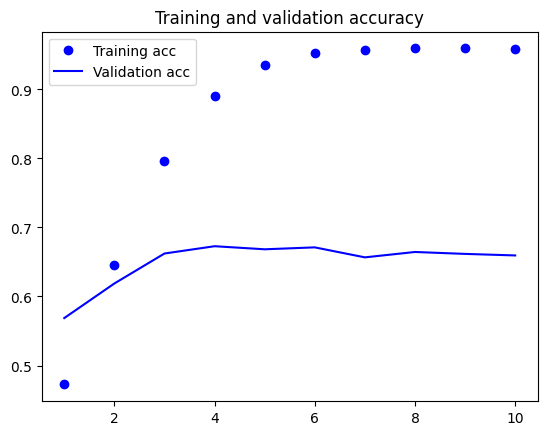

---
Training model with embeddings=64, optimizer=rmsprop, epochs=10, batch_size=128
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.3682 - loss: 2.5204 - val_acc: 0.4307 - val_loss: 2.0644
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.5419 - loss: 1.7612 - val_acc: 0.5715 - val_loss: 1.6777
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.6646 - loss: 1.3662 - val_acc: 0.6416 - val_loss: 1.5025
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.7896 - loss: 0.9504 - val_acc: 0.6533 - val_loss: 1.4353
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8641 - loss: 0.6234 - val_acc: 0.6566 - val_loss: 1.4300
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9146 - loss: 0.4347 - val_acc: 0.6617 - val_loss: 1.4344
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9348 - loss: 0.3101 - val_acc: 0.6561 - val_loss: 1.4707
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9538 - loss: 0.2296 - val_acc: 0.6600

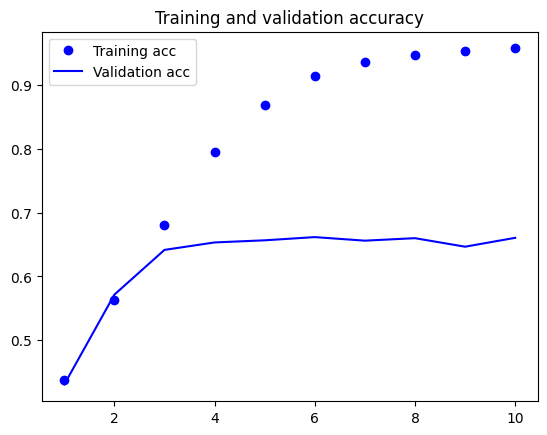

---
Training model with embeddings=64, optimizer=rmsprop, epochs=15, batch_size=32
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.4339 - loss: 2.2180 - val_acc: 0.6043 - val_loss: 1.6039
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.7050 - loss: 1.2144 - val_acc: 0.6694 - val_loss: 1.3500
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.8716 - loss: 0.6254 - val_acc: 0.6761 - val_loss: 1.3373
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9342 - loss: 0.3224 - val_acc: 0.6912 - val_loss: 1.3833
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9603 - loss: 0.1961 - val_acc: 0.6873 - val_loss: 1.4484
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9673 - loss: 0.1520 - val_acc: 0.6667 - val_loss: 1.5331
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9580 - loss: 0.1497 - val_acc: 0.6739 - val_loss: 1.5447
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9646 - loss: 0.1329 - 

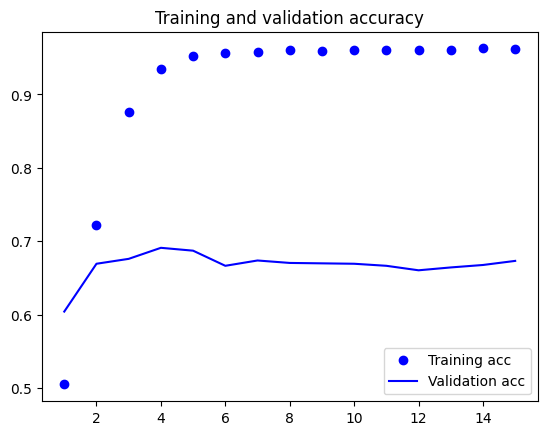

---
Training model with embeddings=64, optimizer=rmsprop, epochs=15, batch_size=64
Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.4109 - loss: 2.3552 - val_acc: 0.5348 - val_loss: 1.8177
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.6191 - loss: 1.5133 - val_acc: 0.6388 - val_loss: 1.6801
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.7837 - loss: 0.9566 - val_acc: 0.6700 - val_loss: 1.4672
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8922 - loss: 0.5406 - val_acc: 0.6722 - val_loss: 1.3945
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9361 - loss: 0.3290 - val_acc: 0.6706 - val_loss: 1.4376
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.9542 - loss: 0.2150 - val_acc: 0.6733 - val_loss: 1.4823
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9625 - loss: 0.1688 - val_acc: 0.6711 - val_loss: 1.5478
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9603 - loss: 0.1528 - 

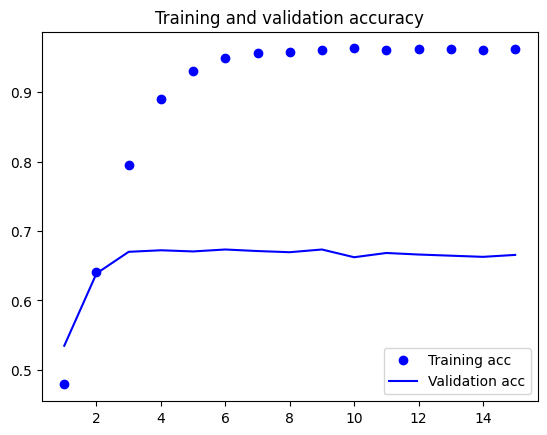

---
Training model with embeddings=64, optimizer=rmsprop, epochs=15, batch_size=128
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.3665 - loss: 2.4966 - val_acc: 0.5047 - val_loss: 1.9616
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.5403 - loss: 1.7637 - val_acc: 0.5576 - val_loss: 1.6769
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.6705 - loss: 1.3367 - val_acc: 0.5893 - val_loss: 1.6430
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7768 - loss: 0.9663 - val_acc: 0.6550 - val_loss: 1.4320
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8719 - loss: 0.6381 - val_acc: 0.6411 - val_loss: 1.4640
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9079 - loss: 0.4528 - val_acc: 0.6455 - val_loss: 1.4996
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9358 - loss: 0.3114 - val_acc: 0.6411 - val_loss: 1.5314
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9504 - loss: 0.2392 - val_acc: 0.6566

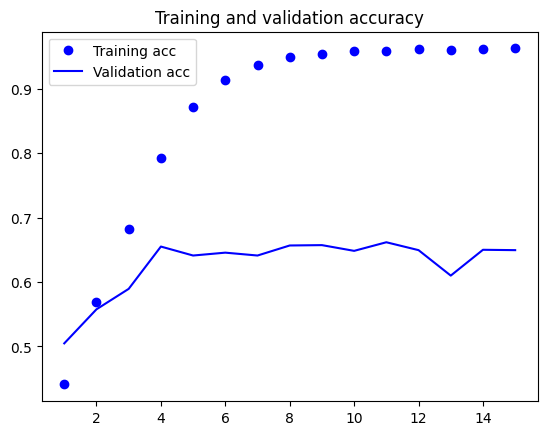

---
Training model with embeddings=64, optimizer=rmsprop, epochs=20, batch_size=32
Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.4374 - loss: 2.1924 - val_acc: 0.5899 - val_loss: 1.6228
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.6948 - loss: 1.2471 - val_acc: 0.6628 - val_loss: 1.3840
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.8711 - loss: 0.6182 - val_acc: 0.6906 - val_loss: 1.3270
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9355 - loss: 0.3167 - val_acc: 0.6817 - val_loss: 1.3857
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9564 - loss: 0.2131 - val_acc: 0.6800 - val_loss: 1.4487
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9640 - loss: 0.1637 - val_acc: 0.6767 - val_loss: 1.5001
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9657 - loss: 0.1350 - val_acc: 0.6711 - val_loss: 1.5211
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9642 - loss: 0.1266 - 

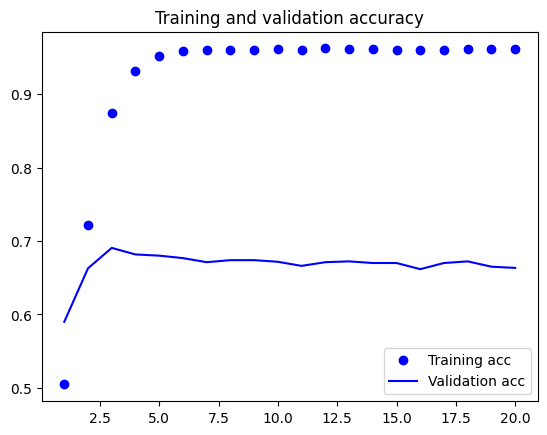

---
Training model with embeddings=64, optimizer=rmsprop, epochs=20, batch_size=64
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.4017 - loss: 2.3481 - val_acc: 0.5403 - val_loss: 1.7603
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.6293 - loss: 1.4807 - val_acc: 0.6416 - val_loss: 1.5021
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.7869 - loss: 0.9227 - val_acc: 0.6745 - val_loss: 1.4090
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8888 - loss: 0.5389 - val_acc: 0.6611 - val_loss: 1.3882
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9360 - loss: 0.3251 - val_acc: 0.6767 - val_loss: 1.4116
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.9551 - loss: 0.2146 - val_acc: 0.6750 - val_loss: 1.4522
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9636 - loss: 0.1607 - val_acc: 0.6739 - val_loss: 1.5151
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.9594 - loss: 0.1597 - 

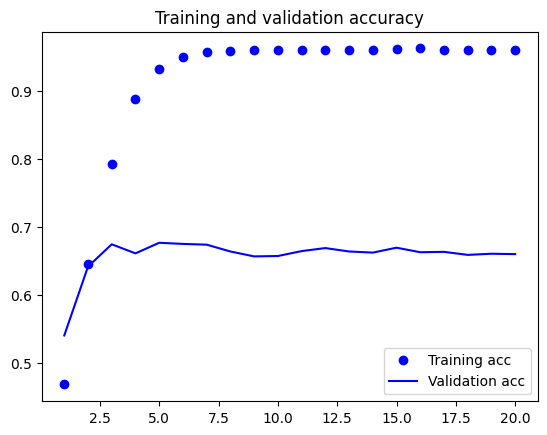

---
Training model with embeddings=64, optimizer=rmsprop, epochs=20, batch_size=128
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.3700 - loss: 2.5325 - val_acc: 0.4018 - val_loss: 2.0497
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.5214 - loss: 1.7712 - val_acc: 0.5615 - val_loss: 1.7383
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.6606 - loss: 1.3709 - val_acc: 0.6077 - val_loss: 1.5770
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7901 - loss: 0.9341 - val_acc: 0.6366 - val_loss: 1.5135
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8683 - loss: 0.6355 - val_acc: 0.6233 - val_loss: 1.4968
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9094 - loss: 0.4273 - val_acc: 0.6366 - val_loss: 1.5118
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9372 - loss: 0.2926 - val_acc: 0.6572 - val_loss: 1.5152
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9521 - loss: 0.2297 - val_acc: 0.6605

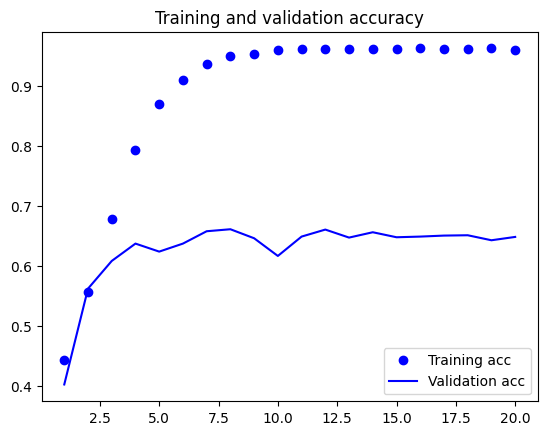

---
Training model with embeddings=64, optimizer=adam, epochs=5, batch_size=32
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.4333 - loss: 2.2660 - val_acc: 0.6416 - val_loss: 1.5301
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.7766 - loss: 0.9980 - val_acc: 0.6939 - val_loss: 1.2728
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - acc: 0.9331 - loss: 0.3501 - val_acc: 0.7034 - val_loss: 1.3206
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9592 - loss: 0.2131 - val_acc: 0.6973 - val_loss: 1.3543
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc: 0.9628 - loss: 0.1679 - val_acc: 0.6962 - val_loss: 1.4012


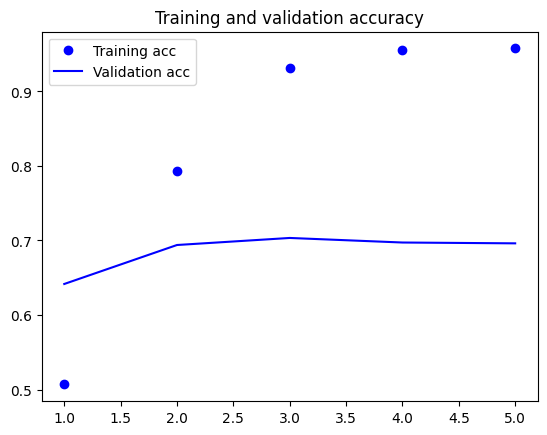

---
Training model with embeddings=64, optimizer=adam, epochs=5, batch_size=64
Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - acc: 0.3789 - loss: 2.4716 - val_acc: 0.5737 - val_loss: 1.6888
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.6695 - loss: 1.3210 - val_acc: 0.6817 - val_loss: 1.3622
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8856 - loss: 0.5791 - val_acc: 0.7001 - val_loss: 1.3061
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9478 - loss: 0.2840 - val_acc: 0.6989 - val_loss: 1.3503
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.9588 - loss: 0.1901 - val_acc: 0.6861 - val_loss: 1.4180


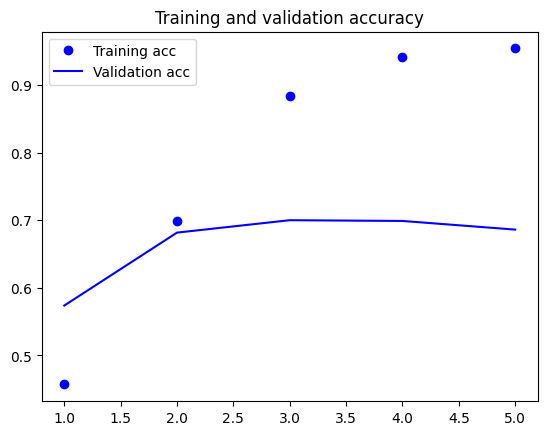

---
Training model with embeddings=64, optimizer=adam, epochs=5, batch_size=128
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.3547 - loss: 2.6488 - val_acc: 0.5203 - val_loss: 1.8795
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.5456 - loss: 1.6847 - val_acc: 0.6322 - val_loss: 1.5381
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.7659 - loss: 1.0287 - val_acc: 0.6811 - val_loss: 1.3433
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8929 - loss: 0.5302 - val_acc: 0.6906 - val_loss: 1.3173
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9438 - loss: 0.3163 - val_acc: 0.6923 - val_loss: 1.3503


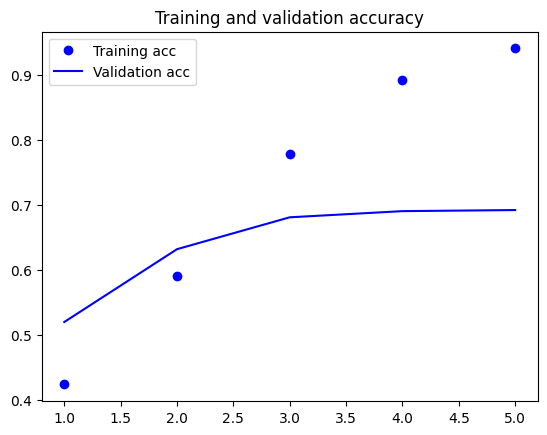

---
Training model with embeddings=64, optimizer=adam, epochs=10, batch_size=32
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc: 0.4122 - loss: 2.3057 - val_acc: 0.6338 - val_loss: 1.4989
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.7616 - loss: 1.0092 - val_acc: 0.7056 - val_loss: 1.2561
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9363 - loss: 0.3409 - val_acc: 0.6973 - val_loss: 1.3148
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9574 - loss: 0.2130 - val_acc: 0.6967 - val_loss: 1.3611
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9636 - loss: 0.1724 - val_acc: 0.6867 - val_loss: 1.4315
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9668 - loss: 0.1633 - val_acc: 0.6784 - val_loss: 1.4347
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9654 - loss: 0.1604 - val_acc: 0.6950 - val_loss: 1.3895
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9673 - loss: 0.1434 - val

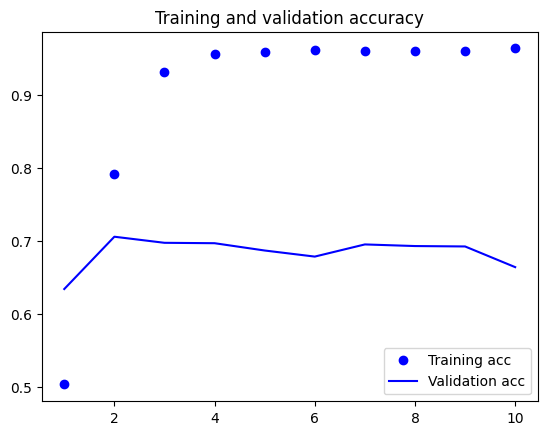

---
Training model with embeddings=64, optimizer=adam, epochs=10, batch_size=64
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.3989 - loss: 2.4077 - val_acc: 0.5826 - val_loss: 1.6802
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.6696 - loss: 1.3257 - val_acc: 0.6962 - val_loss: 1.3448
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8862 - loss: 0.5707 - val_acc: 0.6973 - val_loss: 1.2992
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9442 - loss: 0.2904 - val_acc: 0.7034 - val_loss: 1.3473
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9591 - loss: 0.2001 - val_acc: 0.6945 - val_loss: 1.3855
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9596 - loss: 0.1679 - val_acc: 0.6967 - val_loss: 1.4188
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.9657 - loss: 0.1455 - val_acc: 0.6934 - val_loss: 1.4704
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9676 - loss: 0.1224 - val

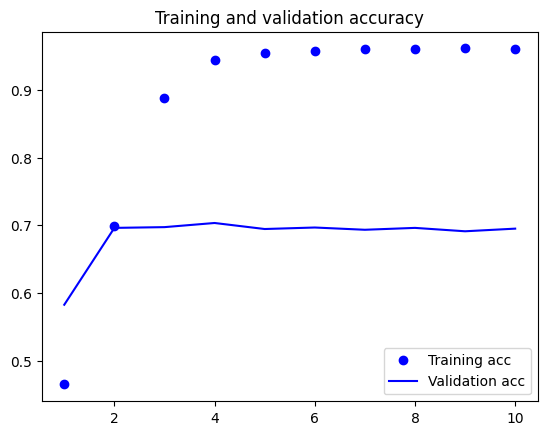

---
Training model with embeddings=64, optimizer=adam, epochs=10, batch_size=128
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.3647 - loss: 2.6222 - val_acc: 0.5053 - val_loss: 1.8645
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.5642 - loss: 1.6216 - val_acc: 0.6199 - val_loss: 1.5447
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.7621 - loss: 1.0136 - val_acc: 0.6767 - val_loss: 1.3643
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8967 - loss: 0.5425 - val_acc: 0.6867 - val_loss: 1.3469
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9436 - loss: 0.3265 - val_acc: 0.6939 - val_loss: 1.3533
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9561 - loss: 0.2193 - val_acc: 0.6839 - val_loss: 1.4080
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9630 - loss: 0.1650 - val_acc: 0.6928 - val_loss: 1.4367
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9656 - loss: 0.1398 - val_acc: 0.6912 - 

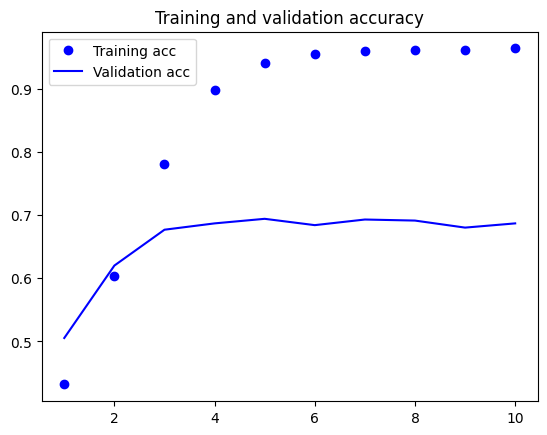

---
Training model with embeddings=64, optimizer=adam, epochs=15, batch_size=32
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc: 0.4221 - loss: 2.2961 - val_acc: 0.6272 - val_loss: 1.5187
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.7724 - loss: 1.0079 - val_acc: 0.7034 - val_loss: 1.2509
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9301 - loss: 0.3536 - val_acc: 0.7062 - val_loss: 1.2903
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9529 - loss: 0.2368 - val_acc: 0.6917 - val_loss: 1.3793
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.9639 - loss: 0.1761 - val_acc: 0.6917 - val_loss: 1.3749
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9637 - loss: 0.1528 - val_acc: 0.6856 - val_loss: 1.4071
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9699 - loss: 0.1439 - val_acc: 0.7006 - val_loss: 1.3723
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.9622 - loss: 0.1523 - val

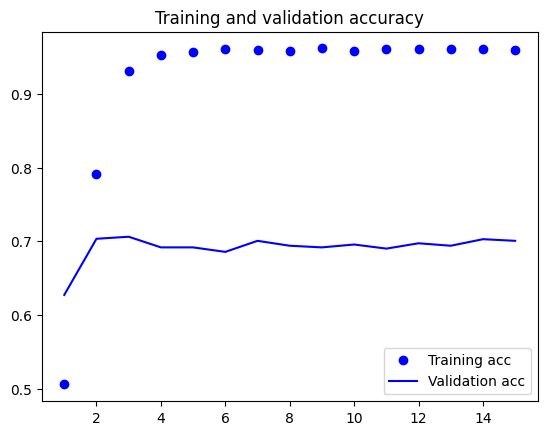

---
Training model with embeddings=64, optimizer=adam, epochs=15, batch_size=64
Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.3819 - loss: 2.4355 - val_acc: 0.5437 - val_loss: 1.7060
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.6554 - loss: 1.3539 - val_acc: 0.6822 - val_loss: 1.3513
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8849 - loss: 0.5864 - val_acc: 0.6973 - val_loss: 1.2835
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.9445 - loss: 0.2855 - val_acc: 0.6889 - val_loss: 1.3324
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.9599 - loss: 0.1988 - val_acc: 0.6878 - val_loss: 1.3786
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9695 - loss: 0.1501 - val_acc: 0.6845 - val_loss: 1.4220
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9611 - loss: 0.1465 - val_acc: 0.6884 - val_loss: 1.4704
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9699 - loss: 0.1289 - val

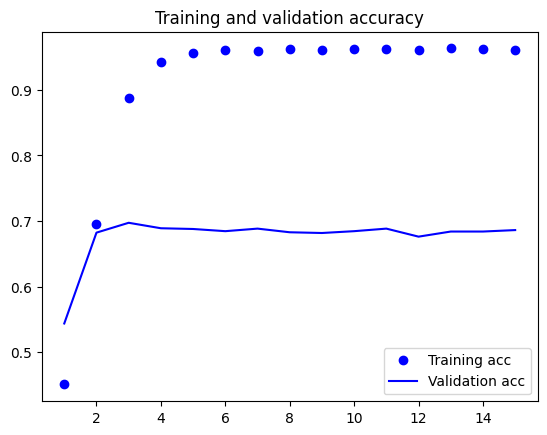

---
Training model with embeddings=64, optimizer=adam, epochs=15, batch_size=128
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.3648 - loss: 2.5992 - val_acc: 0.4986 - val_loss: 1.8822
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.5524 - loss: 1.6432 - val_acc: 0.6344 - val_loss: 1.5707
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.7527 - loss: 1.0890 - val_acc: 0.6795 - val_loss: 1.3694
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.8918 - loss: 0.5644 - val_acc: 0.6828 - val_loss: 1.3331
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9392 - loss: 0.3183 - val_acc: 0.6867 - val_loss: 1.3704
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9559 - loss: 0.2286 - val_acc: 0.6895 - val_loss: 1.3962
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9615 - loss: 0.1685 - val_acc: 0.6895 - val_loss: 1.4291
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9612 - loss: 0.1530 - val_acc: 0.6839 - 

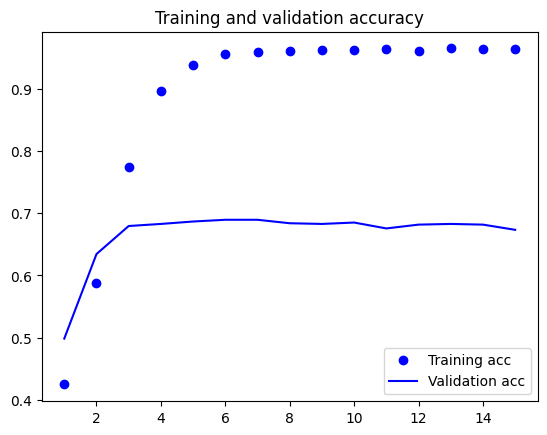

---
Training model with embeddings=64, optimizer=adam, epochs=20, batch_size=32
Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - acc: 0.4064 - loss: 2.3143 - val_acc: 0.6433 - val_loss: 1.5033
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.7726 - loss: 0.9989 - val_acc: 0.7073 - val_loss: 1.3167
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9350 - loss: 0.3532 - val_acc: 0.7045 - val_loss: 1.3075
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9583 - loss: 0.2110 - val_acc: 0.6950 - val_loss: 1.3659
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9644 - loss: 0.1788 - val_acc: 0.6945 - val_loss: 1.4492
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9612 - loss: 0.1824 - val_acc: 0.7006 - val_loss: 1.3939
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9636 - loss: 0.1522 - val_acc: 0.7034 - val_loss: 1.3742
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.9646 - loss: 0.1611 - val

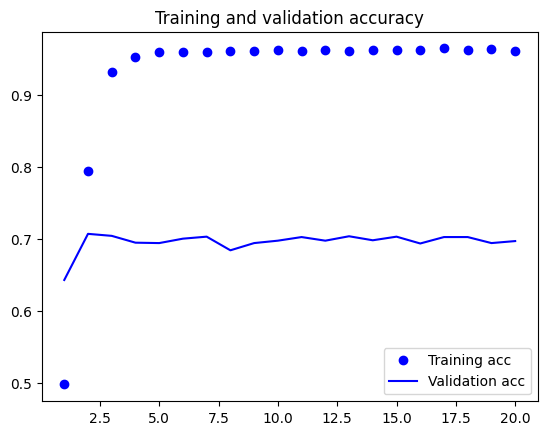

---
Training model with embeddings=64, optimizer=adam, epochs=20, batch_size=64
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.3802 - loss: 2.4581 - val_acc: 0.5392 - val_loss: 1.6988
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.6530 - loss: 1.3466 - val_acc: 0.6795 - val_loss: 1.3629
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8733 - loss: 0.6060 - val_acc: 0.6923 - val_loss: 1.2977
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9520 - loss: 0.2697 - val_acc: 0.6962 - val_loss: 1.3552
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.9634 - loss: 0.1817 - val_acc: 0.6906 - val_loss: 1.4085
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9652 - loss: 0.1550 - val_acc: 0.6928 - val_loss: 1.4094
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.9702 - loss: 0.1343 - val_acc: 0.6923 - val_loss: 1.4456
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9644 - loss: 0.1322 - val

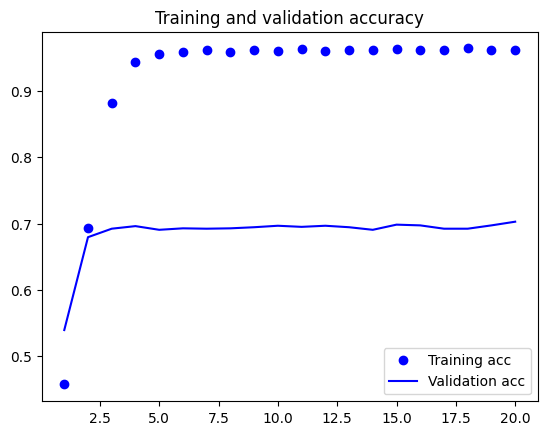

---
Training model with embeddings=64, optimizer=adam, epochs=20, batch_size=128
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.3432 - loss: 2.6321 - val_acc: 0.5181 - val_loss: 1.8694
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.5688 - loss: 1.6414 - val_acc: 0.6166 - val_loss: 1.5444
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.7547 - loss: 1.0170 - val_acc: 0.6689 - val_loss: 1.3851
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.8894 - loss: 0.5457 - val_acc: 0.6784 - val_loss: 1.3447
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9423 - loss: 0.3130 - val_acc: 0.6828 - val_loss: 1.3745
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9567 - loss: 0.2130 - val_acc: 0.6822 - val_loss: 1.4069
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9638 - loss: 0.1565 - val_acc: 0.6800 - val_loss: 1.4457
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9614 - loss: 0.1477 - val_acc: 0.6811 - 

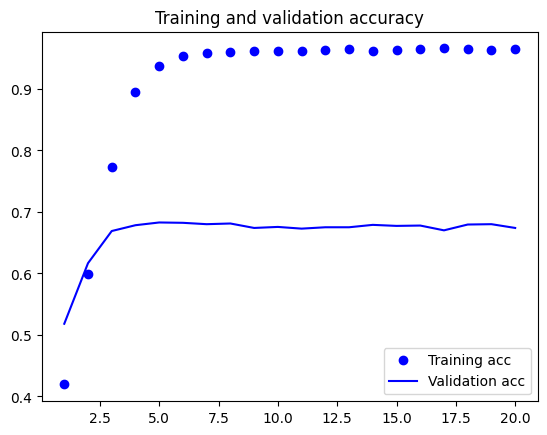

---
Best model:


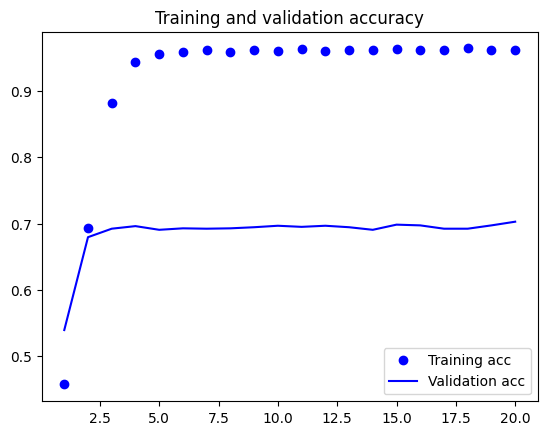

In [ ]:
# optimisation des hyper parametres
def create_model(embeddings, optimizer, epochs, batch_size):
    model = Sequential()
    model.add(Embedding(10000, embeddings, input_length=256))
    model.add(Flatten())
    model.add(Dense(46, activation='softmax'))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    return model

def show_model_stats(history):
    acc = history['acc']
    val_acc = history['val_acc']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()
    
    
# test de plusieurs combinaisons
histories = []

for embeddings in [8, 16, 64]:
    for optimizer in ['rmsprop', 'adam']:
        for epochs in [5, 10, 15]:
            for batch_size in [32, 64]:
                print(f'Training model with embeddings={embeddings}, optimizer={optimizer}, epochs={epochs}, batch_size={batch_size}')
                history = create_model(embeddings, optimizer, epochs, batch_size)
                histories.append(history)
                show_model_stats(history.history)
                print('---')
                
# meilleur model des histories
best_model = max(histories, key=lambda h: h.history['val_acc'][-1])
print('Best model:')
print(best_model)
show_model_stats(best_model.history)


4. **Entraînement et évaluation du modèle** :
   - Entraînez votre modèle en utilisant les données de Reuters et évaluez sa performance en termes de précision, rappel et score F1.
   - **Conseils** : Utilisez la fonction `classification_report` de `sklearn.metrics` pour obtenir un rapport de classification détaillé et `history` de Keras pour visualiser la précision et la perte au cours de l’entraînement.

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.35      0.53      0.42       105
           2       0.00      0.00      0.00        20
           3       0.87      0.90      0.89       813
           4       0.69      0.85      0.76       474
           5       0.00      0.00      0.00         5
           6       0.75      0.21      0.33        14
           7       1.00      0.33      0.50         3
           8       0.41      0.32      0.36        38
           9       0.00      0.00      0.00        25
          10       0.15      0.07      0.09        30
          11       0.41      0.55      0.47        83
          12       0.40      0.15      0.22        13
          13       0.12      0.14      0.13        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.36      0.46      0.4

c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

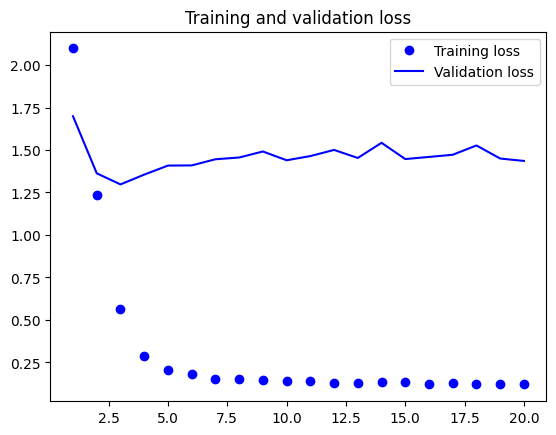

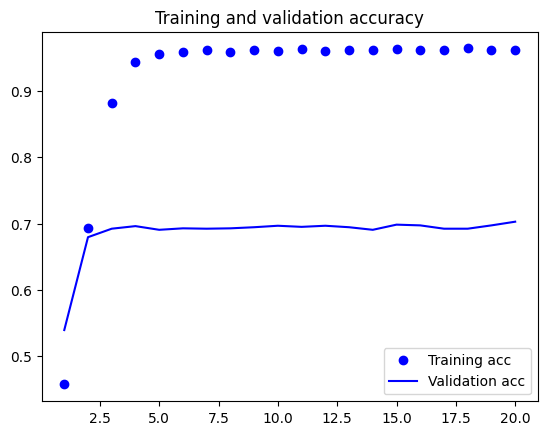

In [11]:
# precision, rappel et F1
from sklearn.metrics import classification_report

predictions = model.predict(test_data)
predictions = [p.argmax() for p in predictions]
print(classification_report(test_labels, predictions))

# plot precision et loss
loss = best_model.history['loss']
val_loss = best_model.history['val_loss']
acc = best_model.history['acc']
val_acc = best_model.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()




5. **Analyse des résultats et visualisation** :
   - Comparez les différentes configurations testées en termes de performance. Incluez des graphiques pour illustrer la précision et la perte au fil des époques pour chaque configuration.
   - **Conseils** : Utilisez des graphiques pour représenter la précision d'entraînement et de validation au fil des époques, et comparez les modèles pour voir comment les choix d’architecture et d’hyperparamètres influencent les résultats.

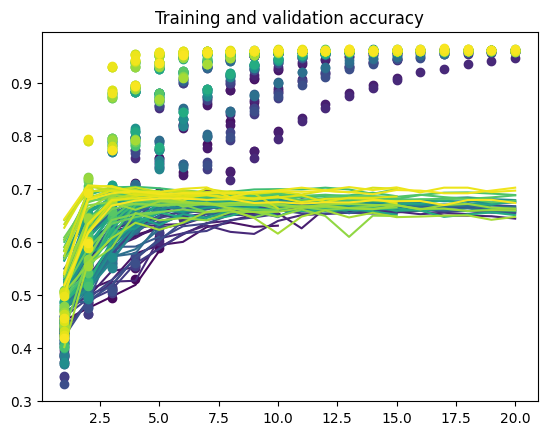

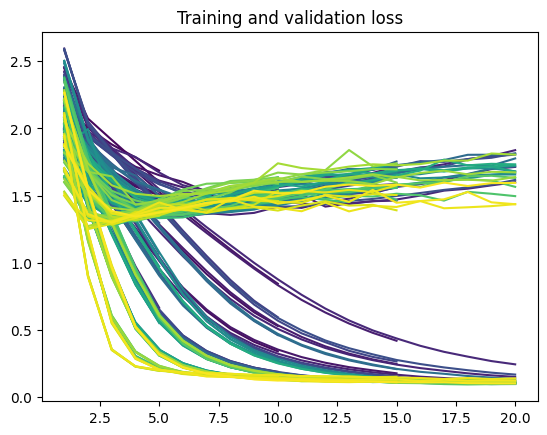

In [24]:
# visualisation des performances de tout les histories
for i, history in enumerate(histories):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    color = plt.cm.viridis(i / len(histories))
    plt.plot(epochs, acc, 'o', label='Training acc', color=color)
    plt.plot(epochs, val_acc, label='Validation acc', color=color)
plt.title('Training and validation accuracy')
plt.show()

for i, hist in enumerate(histories):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['acc']
    epochs = range(1, len(acc) + 1)
    # couleur en fct de l'Index
    color = plt.cm.viridis(i / len(histories))
    plt.plot(epochs, loss, label='Training loss', color=color)
    plt.plot(epochs, val_loss, label='Validation loss', color=color)
plt.title('Training and validation loss')
plt.show()

# Exercice 3

Dans cet exercice, vous utiliserez le dataset CIFAR-10 de TensorFlow pour construire et évaluer un modèle de réseau de neurones convolutif (CNN) capable de classifier des images en 10 catégories (avions, voitures, oiseaux, chats, etc.).

1. **Chargement et Prétraitement des Données** :
   - Chargez le dataset CIFAR-10 à partir de `tf.keras.datasets.cifar10`. Ce dataset contient 60 000 images de 32x32 pixels réparties en 10 classes, avec 50 000 images pour l'entraînement et 10 000 pour le test.
   - Normalisez les valeurs des pixels des images entre 0 et 1 pour faciliter l'apprentissage.
   - Appliquez des techniques d'augmentation de données (data augmentation) pour rendre le modèle plus robuste. Utilisez des transformations telles que la rotation, le zoom, et le retournement horizontal pour augmenter la diversité des images d'entraînement.

In [1]:
from tensorflow.keras.datasets import cifar10

# normalisation des données
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# augmentation de la data par rotation, zoom, flip
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')



2. **Création d'un Modèle de Réseau de Neurones Convolutif (CNN)** :
   - Concevez un modèle CNN en utilisant des couches de convolution et de pooling pour extraire les caractéristiques importantes des images.
   - Structure suggérée :
     - **Couche de Convolution** : plusieurs filtres (par exemple, 32, 64, 128) avec une petite taille de filtre (3x3), suivis d'une activation ReLU.
     - **Couche de Pooling** : réduction de la taille des cartes de caractéristiques pour diminuer la complexité (par exemple, max pooling 2x2).
     - **Couches Denses** : après les couches convolutives, aplatissez les cartes de caractéristiques et ajoutez une ou plusieurs couches entièrement connectées pour la classification.
     - **Régularisation** : intégrez des techniques de régularisation comme le dropout ou la batch normalization pour éviter le surapprentissage.
   - Testez différentes architectures en ajoutant ou supprimant des couches pour observer leur impact sur les performances.

In [ ]:
# creation model CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
convolutions = [32, 64, 128]

model = Sequential()
model.add(Conv2D(convolutions[0], (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(convolutions[1], (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(convolutions[2], (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(convolutions[1], activation='relu'))
model.add(Dense(10))

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10))

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10))

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(10))


c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=5, validation_data=(test_data, test_labels))
history2 = model2.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=5, validation_data=(test_data, test_labels))
history3 = model3.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=5, validation_data=(test_data, test_labels))


Epoch 1/5


c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - acc: 0.1189 - loss: 2.6380 - val_acc: 0.1194 - val_loss: 2.3026
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - acc: 0.1218 - loss: 2.3026 - val_acc: 0.1194 - val_loss: 2.3026
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - acc: 0.1183 - loss: 2.3026 - val_acc: 0.1194 - val_loss: 2.3026
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - acc: 0.1193 - loss: 2.3026 - val_acc: 0.1194 - val_loss: 2.3026
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - acc: 0.1187 - loss: 2.3026 - val_acc: 0.1194 - val_loss: 2.3026
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - acc: 0.0926 - loss: 3.1613 - val_acc: 0.0942 - val_loss: 2.3026
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - acc: 0.0936 - loss: 2.3026 - val_acc: 0.0942 - val_loss: 2.3026
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - acc: 0.0928 - loss: 2.3026 - val_acc: 0.0942 - val_loss: 2.3026
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3

c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

NameError: name 'plt' is not defined

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.08      0.00      0.01      1000
           3       0.00      0.00      0.00      1000
           4       0.11      0.64      0.19      1000
           5       0.00      0.00      0.00      1000
           6       0.16      0.00      0.01      1000
           7       0.00      0.00      0.00      1000
           8       0.13      0.51      0.21      1000
           9       0.10      0.04      0.05      1000

    accuracy                           0.12     10000
   macro avg       0.06      0.12      0.05     10000
weighted avg       0.06      0.12      0.05     10000



c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

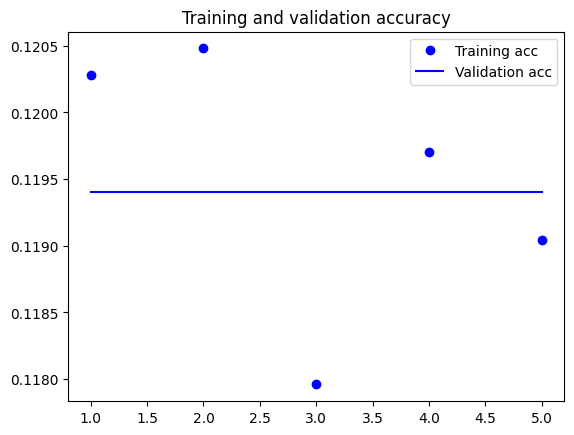

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.10      0.93      0.17      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.06      0.02      0.03      1000

    accuracy                           0.09     10000
   macro avg       0.02      0.09      0.02     10000
weighted avg       0.02      0.09      0.02     10000



c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

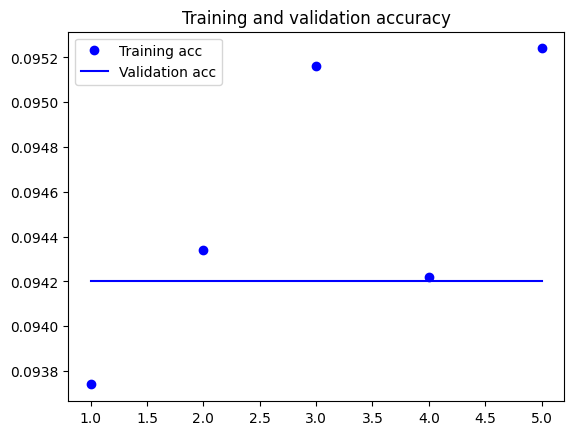

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.15      0.03      0.05      1000
           8       0.10      0.97      0.18      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.03      0.10      0.02     10000
weighted avg       0.03      0.10      0.02     10000



c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

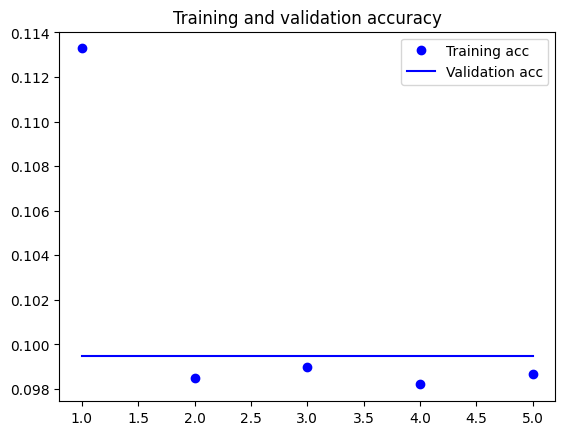

In [6]:
import matplotlib.pyplot as plt
# precision, rappel et F1
from sklearn.metrics import classification_report

predictions = model.predict(test_data)
predictions = [p.argmax() for p in predictions]
print(classification_report(test_labels, predictions))
# visualisation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

predictions = model2.predict(test_data)
predictions = [p.argmax() for p in predictions]
print(classification_report(test_labels, predictions))
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']

epochs2 = range(1, len(acc2) + 1)

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


predictions = model3.predict(test_data)
predictions = [p.argmax() for p in predictions]
print(classification_report(test_labels, predictions))
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']

epochs3 = range(1, len(acc3) + 1)

plt.plot(epochs3, acc3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


le model 3 est meilleur: plus rapide et aussi performant que les autres

3. **Entraînement et Optimisation du Modèle** :
   - Entraînez le modèle en utilisant la fonction de perte `sparse_categorical_crossentropy`, car il s'agit d'un problème de classification multiclasses.
   - Utilisez l’optimiseur Adam et testez différents taux d'apprentissage pour voir leur effet sur la convergence (par exemple, commencez avec 0.001).
   - Ajustez d'autres hyperparamètres comme la taille de batch et le nombre d'époques, afin de trouver une configuration optimale qui équilibre précision et temps de calcul.

In [7]:
# changement de la fonction de pertes + learning rate
from tensorflow.keras.models import clone_model
from tensorflow.keras.optimizers import Adam

# create copy model3
model3_best = clone_model(model3)
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['acc'])
model31 = clone_model(model3_best)
model31.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])
model32 = clone_model(model3_best)
model32.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

history3 = model3.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=5, validation_data=(test_data, test_labels))
history31 = model31.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=5, validation_data=(test_data, test_labels))
history32 = model32.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=5, validation_data=(test_data, test_labels))

# precision, rappel et F1
from sklearn.metrics import classification_report

predictions = model3.predict(test_data)
predictions = [p.argmax() for p in predictions]
print(classification_report(test_labels, predictions))

predictions = model31.predict(test_data)
predictions = [p.argmax() for p in predictions]
print(classification_report(test_labels, predictions))

predictions = model32.predict(test_data)
predictions = [p.argmax() for p in predictions]
print(classification_report(test_labels, predictions))

Epoch 1/5


c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - acc: 0.0985 - loss: 2.3026 - val_acc: 0.0995 - val_loss: 2.3026
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - acc: 0.0963 - loss: 2.3026 - val_acc: 0.0995 - val_loss: 2.3026
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - acc: 0.0980 - loss: 2.3026 - val_acc: 0.0995 - val_loss: 2.3026
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - acc: 0.0968 - loss: 2.3026 - val_acc: 0.0995 - val_loss: 2.3026
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - acc: 0.0986 - loss: 2.3026 - val_acc: 0.0995 - val_loss: 2.3026
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - acc: 0.1042 - loss: 5.6036 - val_acc: 0.1000 - val_loss: 8.2390
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - acc: 0.1025 - loss: 8.1452 - val_acc: 0.1000 - val_loss: 8.2390
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - acc: 0.1012 - loss: 8.2140 - val_acc: 0.1000 - val_loss: 8.2390
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3

c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.10      1.00      0.18      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

  1/313 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step

c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.13      0.07      0.09      1000
           6       0.00      0.00      0.00      1000
           7       0.10      0.94      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.02      0.10      0.03     10000
weighted avg       0.02      0.10      0.03     10000



c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CPE\Desktop\code\deep-learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

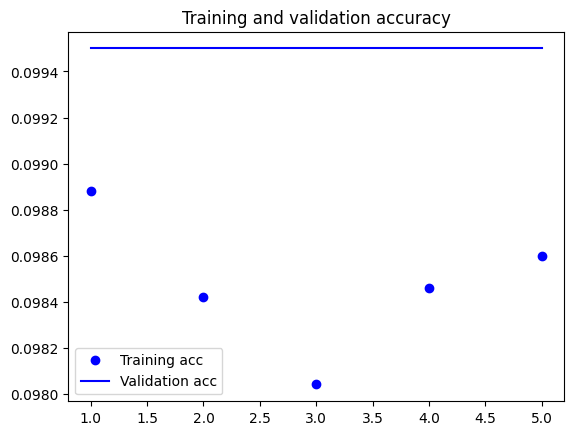

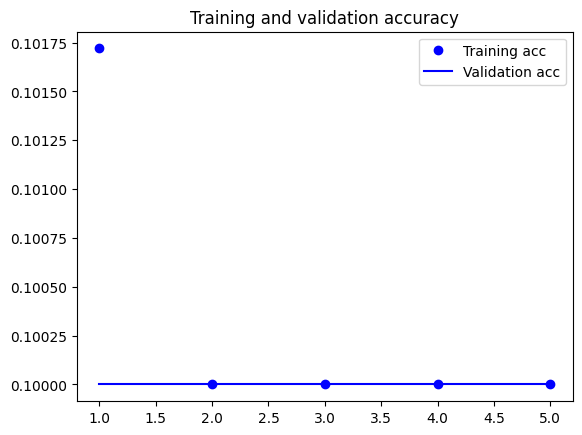

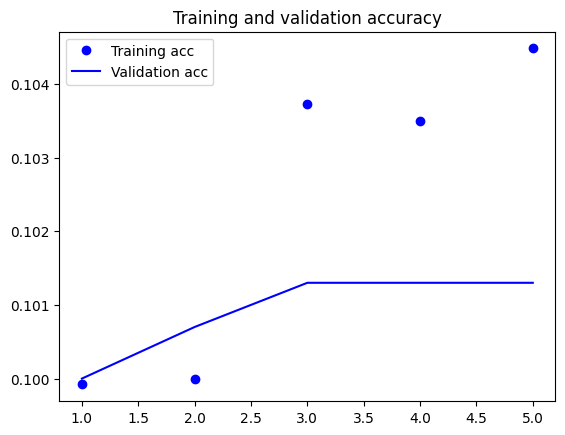

In [8]:
# visualisation
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

acc31 = history31.history['acc']
val_acc31 = history31.history['val_acc']
loss31 = history31.history['loss']
epochs31 = range(1, len(acc31) + 1)
plt.plot(epochs31, acc31, 'bo', label='Training acc')
plt.plot(epochs31, val_acc31, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

acc32 = history32.history['acc']
val_acc32 = history32.history['val_acc']
loss32 = history32.history['loss']
epochs32 = range(1, len(acc32) + 1)
plt.plot(epochs32, acc32, 'bo', label='Training acc')
plt.plot(epochs32, val_acc32, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [11]:
#Compilation du modèle
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',
loss=SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
history = model4.fit(train_data, train_labels, epochs=5,
validation_data=(test_data, test_labels))

# visualisation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()



Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4663 - loss: 1.4664 - val_accuracy: 0.5722 - val_loss: 1.2184
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5906 - loss: 1.1633 - val_accuracy: 0.6159 - val_loss: 1.0894
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6449 - loss: 1.0122 - val_accuracy: 0.6545 - val_loss: 1.0038
Epoch 4/5
1393/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6783 - loss: 0.9185

KeyboardInterrupt: 